## DAT Capstone Project 

**Student name: Ravinarayan Raghupathi, MSc PhD**

**Instructor name: Hardik Idnani**

In [2]:
#Import all required packages#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_validate

## Overview
<p> 
     <div align="justify">
The tertiary structure of a protein is its three-dimensional (3D) folded shape and is defined by its atomic co-ordinates. Proteins are polymers of amino acids, which in the folded protein can be hidden or exposed. Analysing where these residues are in the final 3D shape is of key importance in understanding protein function. The prediction of a protein's tertiary structure is crucial in understanding protein-drug, protein-protein interactions, etc., and remains one of the most challenging exercises in bioinformatics, because of the number of variables involved. Over the last decade or so, machine-learning and other analyses have become popular tools in protein structure prediction. 
    </div>
    
###  Problem statement:
Can multi-linear regression help determine which physicochemical factors can help predict the tertiary structure of a protein?

### My strategy
<p>
  <div align="justify">
Here I use multi-linear regression analysis of a freely available dataset that includes 9 physicochemical properties (the independent variables) to assess their effect on predicting the dependent variable RMSD (Root Mean Square Deviation) of residue size (ranging from 0 to 21 Ångströms) in a decoy set. Decoys are computer-generated tertiary structures for a given amino acid sequence. All the variables are numerical and continuous and there are no categorical variables present in the dataset. The data was originally obtained from the Critical Assessment of Techniques for Protein Structure Prediction (CASP) 5 to 9 Experiments.
    </div>
    
### Source of data

(http://archive.ics.uci.edu/dataset/265/physicochemical+properties+of+protein+tertiary+structure)

### Brief description of variables in the dataset:
RMSD - Size of the residue.

F1: Total surface area.

F2: Non polar exposed area.

F3: Fractional area of exposed non polar residue.

F4: Fractional area of exposed non polar part of residue.

F5: Molecular mass weighted exposed area.

F6: Average deviation from standard exposed area of residue.

F7: Euclidean distance.

F8: Secondary structure penalty.

F9: Spatial Distribution constraints (N,K Value).

### Step 1: Exploratory data analysis
<p>
<div align="justify">
Analyse the given dataset to create a dataframe, check for NaN and unique values, check distribution and linearity of variables and eliminate outliers if required 
    </div>

In [3]:
#Creating the first dataframe#

df1=pd.read_csv('./Data/CASP.csv')
df1.head()

RMSD        F1       F2       F3        F4            F5        F6  \
0  17.284  13558.30  4305.35  0.31754  162.1730  1.872791e+06  215.3590   
1   6.021   6191.96  1623.16  0.26213   53.3894  8.034467e+05   87.2024   
2   9.275   7725.98  1726.28  0.22343   67.2887  1.075648e+06   81.7913   
3  15.851   8424.58  2368.25  0.28111   67.8325  1.210472e+06  109.4390   
4   7.962   7460.84  1736.94  0.23280   52.4123  1.021020e+06   94.5234   

        F7   F8       F9  
0  4287.87  102  27.0302  
1  3328.91   39  38.5468  
2  2981.04   29  38.8119  
3  3248.22   70  39.0651  
4  2814.42   41  39.9147

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [5]:
#Checking shape of df1#
display (df1.shape)

#Checking for NaN values in df1#
display(df1.isna().values.any())

#Checking number of unique values for each variable#
count = df1.nunique()
display(count)

(45730, 10)

False

RMSD    15903
F1      39916
F2      39863
F3      20089
F4      40374
F5      41868
F6      39155
F7      39450
F8        341
F9      37299
dtype: int64

In [6]:
#Getting the statistics for df1#
df1.describe()

RMSD            F1            F2            F3            F4  \
count  45730.000000  45730.000000  45730.000000  45730.000000  45730.000000   
mean       7.748528   9871.596995   3017.367175      0.302392    103.492433   
std        6.118312   4058.138034   1464.324663      0.062886     55.424985   
min        0.000000   2392.050000    403.500000      0.092500     10.310100   
25%        2.305000   6936.680000   1979.045000      0.258740     63.563900   
50%        5.030000   8898.805000   2668.155000      0.300150     87.740800   
75%       13.379000  12126.150000   3786.410000      0.342890    133.646750   
max       20.999000  40034.900000  15312.000000      0.577690    369.317000   

                 F5            F6             F7            F8            F9  
count  4.573000e+04  45730.000000   45730.000000  45730.000000  45730.000000  
mean   1.368299e+06    145.638061    3989.755990     69.975071     34.523664  
std    5.640367e+05     69.999230    1993.574575     56.493443      5.979755  
min    3.194902e+05     31.970400       0.000000      0.000000     15.228000  
25%    9.535912e+05     94.757500    3165.322500     31.000000     30.424725  
50%    1.237219e+06    126.176000    3840.170000     54.000000     35.299300  
75%    1.690920e+06    181.468500    4644.192500     91.000000     38.870800  
max    5.472011e+06    598.408000  105948.170000    350.000000     55.300900

#### Distribution of predictors
Check how the predictors are distributed using combined KDE and histogram plots.

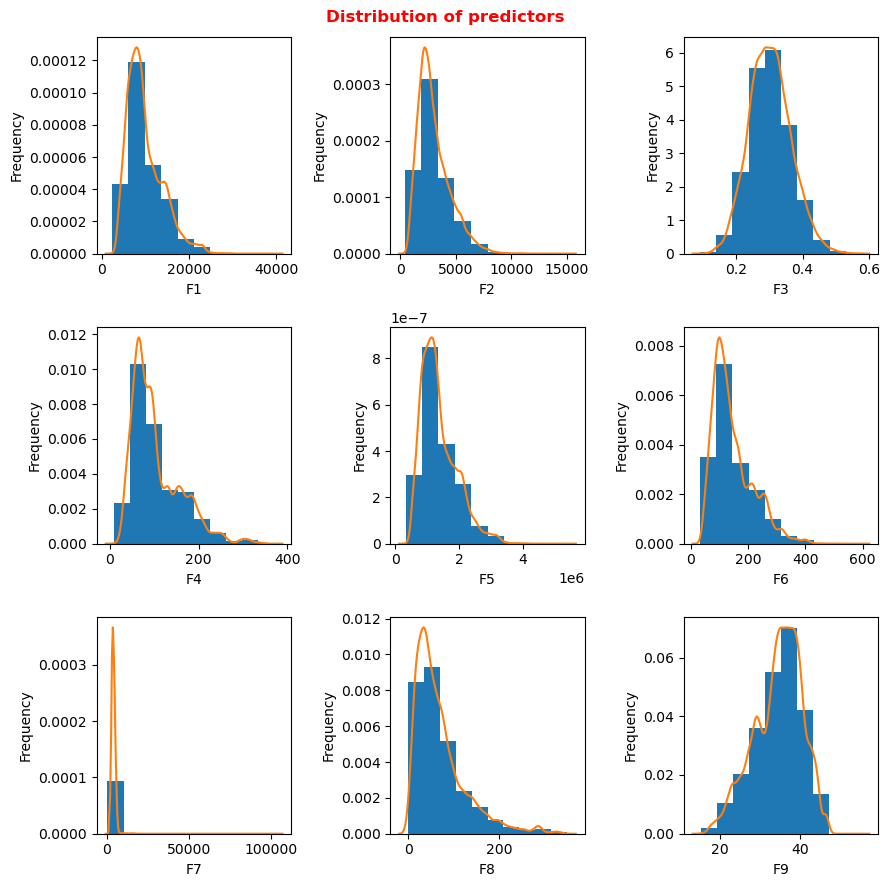

In [13]:
#Checking distribution of predictors with combined KDE and Histogram#
fig, (axs1, axs2,axs3) = plt.subplots(figsize=(9,9), nrows=3, ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3


y=df1.RMSD
x1=df1.F1
x2=df1.F2
x3=df1.F3
x4=df1.F4
x5=df1.F5
x6=df1.F6
x7=df1.F7
x8=df1.F8
x9=df1.F9

x1.plot.hist(ax=ax1, density=True)
sns.kdeplot(ax=ax1,data=x1)
x2.plot.hist(ax=ax2, density=True)
sns.kdeplot(ax=ax2,data=x2)
x3.plot.hist(ax=ax3, density=True)
sns.kdeplot(ax=ax3,data=x3)
x4.plot.hist(ax=ax4, density=True)
sns.kdeplot(ax=ax4,data=x4)
x5.plot.hist(ax=ax5, density=True)             
sns.kdeplot(ax=ax5,data=x5)
x6.plot.hist(ax=ax6, density=True)             
sns.kdeplot(ax=ax6,data=x6)
x7.plot.hist(ax=ax7, density=True)             
sns.kdeplot(ax=ax7,data=x7)
x8.plot.hist(ax=ax8, density=True)            
sns.kdeplot(ax=ax8,data=x8)
x9.plot.hist(ax=ax9, density=True)            
sns.kdeplot(ax=ax9,data=x9)
#y.plot.hist(ax=axs4, density=True)
#sns.kdeplot(ax=axs4,data=y)


plt.suptitle("Distribution of predictors", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
#plt.savefig('Images/KDE_Hist_check_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Distribution of dependent variable
Check how the dependent variable is distributed using a combined KDE and histogram plot.

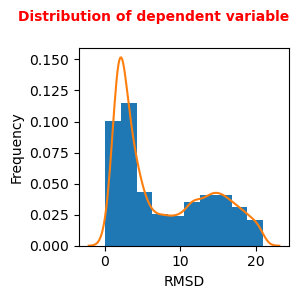

In [25]:
fig,ax=plt.subplots(figsize=(3,3))

y.plot.hist(ax=ax, density=True)
sns.kdeplot(ax=ax,data=y)

plt.suptitle("Distribution of dependent variable", color='red', fontsize = 10, fontweight ="bold")
plt.tight_layout()
#plt.savefig('Images/Dep_KDE_Hist_check_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Linearity check
Use scatter plots to check the relationship between the dependent and the independent variables.

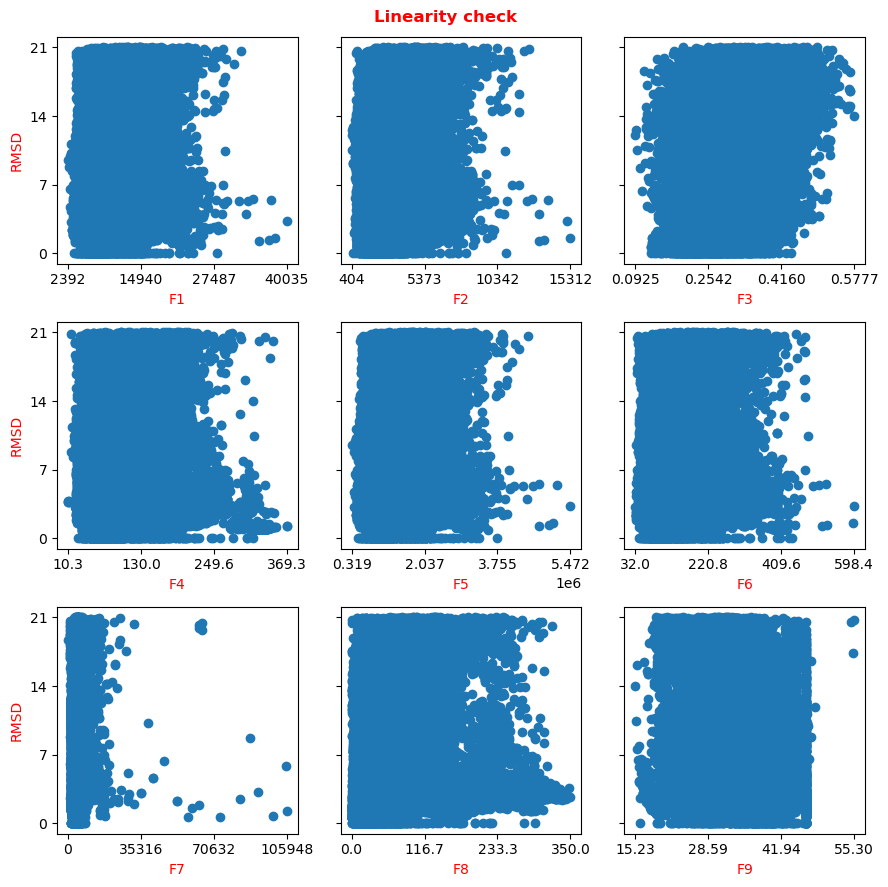

In [37]:
#Visualising linearity between independent and dependent variables#

fig, (axs1, axs2, axs3) = plt.subplots(figsize=(9,9), nrows= 3, ncols=3, sharey=True)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 =axs3

plt.ticklabel_format(style='plain')

ax1.scatter(x1,y)
ax1.set_xlabel('F1', c="r")
ax1.set_ylabel('RMSD',c="r")
xticks1 = np.linspace(start=min(x1), stop=max(x1), num=4)
yticks1 = np.linspace(start=min(y), stop=max(y), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(x2,y)
ax2.set_xlabel('F2', c="r")
xticks2 = np.linspace(start=min(x2), stop=max(x2), num=4)
yticks2 = np.linspace(start=min(y), stop=max(y), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(x3,y)
ax3.set_xlabel('F3', c="r")
xticks3 = np.linspace(start=min(x3), stop=max(x3), num=4)
yticks3 = np.linspace(start=min(y), stop=max(y), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

ax4.scatter(x4,y)
ax4.set_xlabel('F4', c="r")
ax4.set_ylabel('RMSD',c="r")
xticks4 = np.linspace(start=min(x4), stop=max(x4), num=4)
yticks4 = np.linspace(start=min(y), stop=max(y), num=4)
ax4.set_xticks(xticks4)
ax4.set_yticks(yticks4)

ax5.scatter(x5,y)
ax5.set_xlabel('F5', c="r")
xticks5 = np.linspace(start=min(x5), stop=max(x5), num=4)
yticks5 = np.linspace(start=min(y), stop=max(y), num=4)
ax5.set_xticks(xticks5)
ax5.set_yticks(yticks5)

ax6.scatter(x6,y)
ax6.set_xlabel('F6', c="r")
xticks6 = np.linspace(start=min(x6), stop=max(x6), num=4)
yticks6 = np.linspace(start=min(y), stop=max(y), num=4)
ax6.set_xticks(xticks6)
ax6.set_yticks(yticks6)

ax7.scatter(x7,y)
ax7.set_xlabel('F7', c="r")
ax7.set_ylabel('RMSD',c="r")
xticks7 = np.linspace(start=min(x7), stop=max(x7), num=4)
yticks7 = np.linspace(start=min(y), stop=max(y), num=4)
ax7.set_xticks(xticks7)
ax7.set_yticks(yticks7)

ax8.scatter(x8,y)
ax8.set_xlabel('F8', c="r")
xticks8 = np.linspace(start=min(x8), stop=max(x8), num=4)
yticks8 = np.linspace(start=min(y), stop=max(y), num=4)
ax8.set_xticks(xticks8)
ax8.set_yticks(yticks8)

ax9.scatter(x9,y)
ax9.set_xlabel('F9', c="r")
xticks9 = np.linspace(start=min(x9), stop=max(x9), num=4)
yticks9 = np.linspace(start=min(y), stop=max(y), num=4)
ax9.set_xticks(xticks9)
ax9.set_yticks(yticks9)

plt.suptitle("Linearity check", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
#plt.savefig('Images/Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

<div align="justify">
It appears from the dataframe statistics and the linearity plots that there are definitely outliers in some columns that will need to be eliminated.
    </div>

#### Removal of outliers

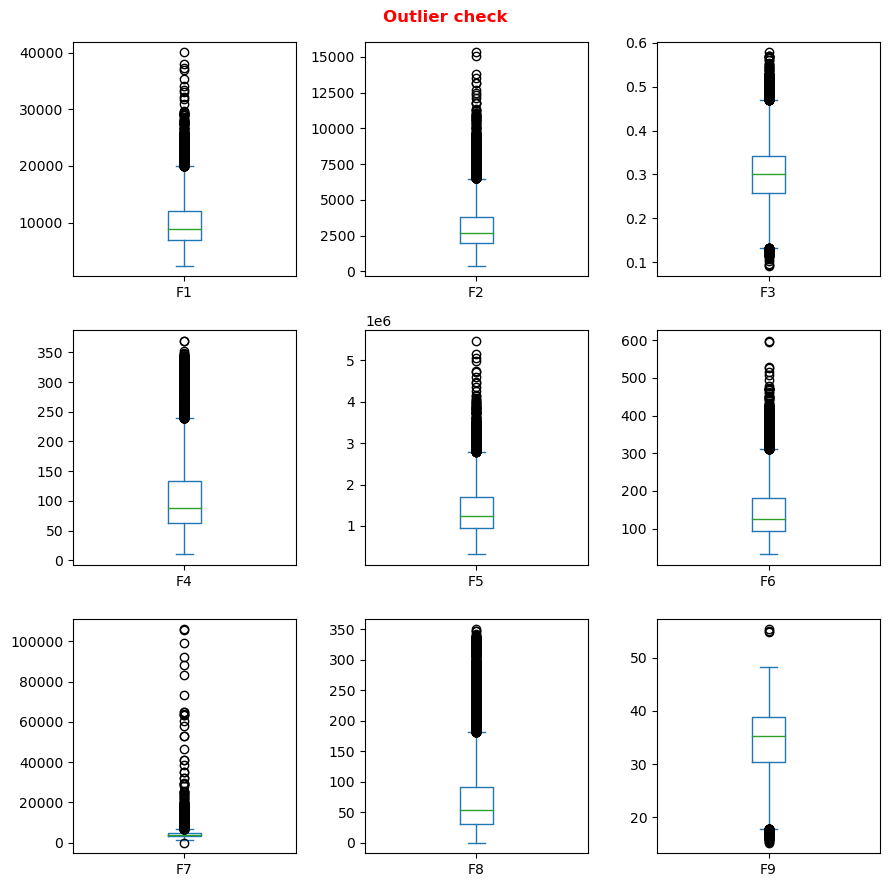

In [38]:
#Checking outlier values in continous variables with boxplots#

fig,(axs1, axs2, axs3)=plt.subplots(figsize=(9,9),nrows=3, ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

x1.plot.box(ax=ax1)
x2.plot.box(ax=ax2)
x3.plot.box(ax=ax3)
x4.plot.box(ax=ax4)
x5.plot.box(ax=ax5)
x6.plot.box(ax=ax6)
x7.plot.box(ax=ax7)
x8.plot.box(ax=ax8)
x9.plot.box(ax=ax9)

plt.suptitle("Outlier check", c="r", fontsize = 12, fontweight ="bold")
fig.tight_layout()
#plt.savefig('Images/Outliers_check_boxplot.png',dpi=300,bbox_inches='tight')
plt.show()

In [39]:
# Removing outliers with IQR and creating new dataframe#
print('DF shape with outliers',  df1.shape)
     
cols = ['F1','F2','F3','F4','F5','F6','F7','F8','F9']

Q1 = df1[cols].quantile(0.25)
Q3 = df1[cols].quantile(0.75)
IQR = Q3 - Q1

df2 = df1[~((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print('DF shape after removing outliers',  df2.shape)

DF shape with outliers (45730, 10)
DF shape after removing outliers (41459, 10)


In [40]:
df2.describe()

RMSD            F1            F2            F3            F4  \
count  41459.000000  41459.000000  41459.000000  41459.000000  41459.000000   
mean       7.766480   9117.339400   2749.260475      0.299416     93.619470   
std        6.065987   3168.727533   1151.330998      0.061170     43.725481   
min        0.000000   2392.050000    513.410000      0.133140     10.310100   
25%        2.283000   6763.835000   1915.690000      0.256170     62.093050   
50%        5.195000   8559.520000   2537.730000      0.297510     82.777200   
75%       13.382500  11018.250000   3417.915000      0.340990    115.474500   
max       20.999000  19760.500000   6496.520000      0.469070    238.735000   

                 F5            F6            F7            F8            F9  
count  4.145900e+04  41459.000000  41459.000000  41459.000000  41459.000000  
mean   1.265463e+06    132.387787   3742.477090     58.834294     35.417579  
std    4.449418e+05     54.724187    952.455393     39.704148      5.207610  
min    3.194902e+05     31.970400   1089.190000      0.000000     18.069600  
25%    9.290097e+05     92.135450   3109.020000     29.000000     32.164000  
50%    1.190385e+06    119.799000   3739.620000     49.000000     35.884600  
75%    1.533902e+06    163.541500   4416.135000     79.000000     39.104650  
max    2.786190e+06    311.197000   6854.930000    181.000000     48.202800

#### Checking distribution after removing outliers

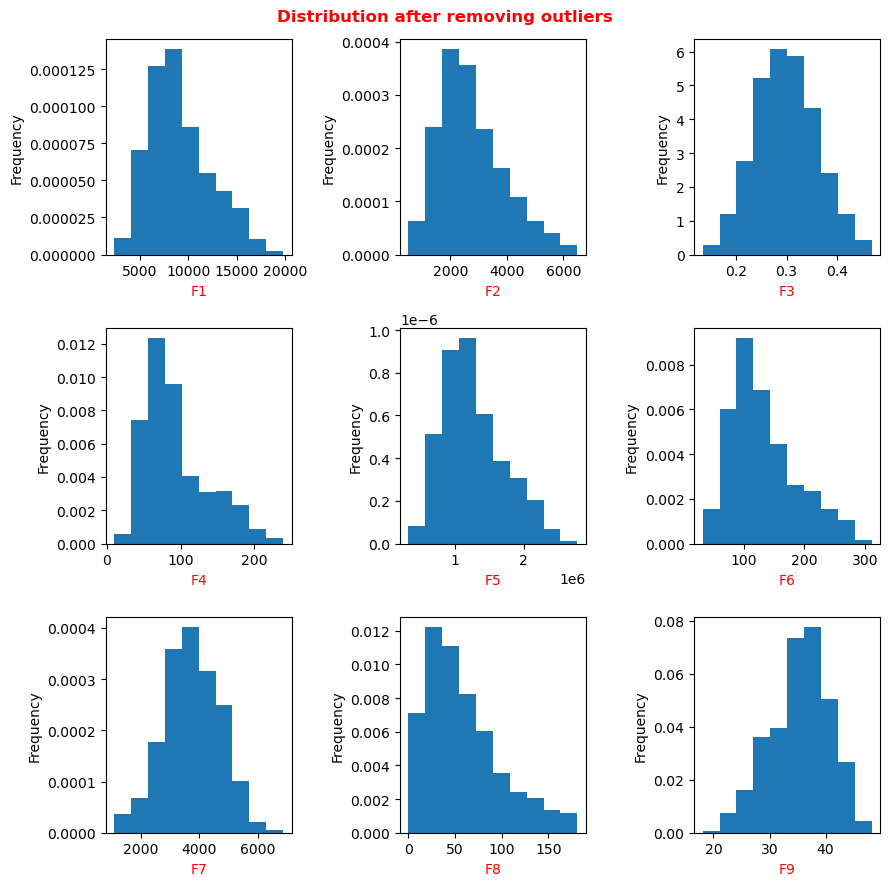

In [41]:
#Using histograms to check distribution of independent variables after removing outliers#
fig, (axs1,axs2,axs3)=plt.subplots(figsize=(9,9), nrows=3,ncols=3)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

#Reassigning variables to df2#
y1=df2.RMSD
a1=df2.F1
a2=df2.F2
a3=df2.F3
a4=df2.F4
a5=df2.F5
a6=df2.F6
a7=df2.F7
a8=df2.F8
a9=df2.F9

a1.plot.hist(ax=ax1,density=True)
a2.plot.hist(ax=ax2,density=True)
a3.plot.hist(ax=ax3,density=True)
a4.plot.hist(ax=ax4,density=True)
a5.plot.hist(ax=ax5,density=True)
a6.plot.hist(ax=ax6,density=True)
a7.plot.hist(ax=ax7,density=True)
a8.plot.hist(ax=ax8,density=True)
a9.plot.hist(ax=ax9,density=True)

ax1.set_xlabel('F1',c='r')
ax2.set_xlabel('F2',c='r')
ax3.set_xlabel('F3',c='r')
ax4.set_xlabel('F4',c='r')
ax5.set_xlabel('F5',c='r')
ax6.set_xlabel('F6',c='r')
ax7.set_xlabel('F7',c='r')
ax8.set_xlabel('F8',c='r')
ax9.set_xlabel('F9',c='r')

plt.suptitle("Distribution after removing outliers", c="r", fontsize = 12, fontweight ="bold")
fig.tight_layout()
#plt.savefig('Images/Dist_after_outlier_removal.png',dpi=300,bbox_inches='tight')
plt.show()

<div align="justify">
The distributions have improved and appear more normal than before. 
    </div>

### Step 2: Baseline model (Iteration 1)
Perform multilinear Ordinary Least Squares (OLS) regression, create a baseline model and test assumptions of regression in that model.

#### Create the Baseline model

In [43]:
#Baseline model
X1 = df2.drop('RMSD',axis=1)
y1 = df2['RMSD']
X1_int = sm.add_constant(X1)
model1 = sm.OLS(y1,X1_int).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   RMSD   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1883.
Date:                Thu, 20 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:20:57   Log-Likelihood:            -1.2646e+05
No. Observations:               41459   AIC:                         2.529e+05
Df Residuals:                   41449   BIC:                         2.530e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9420      0.793      8.759      0.000       5.389       8.495
F1             0.0024      0.000     17.504      0.000       0.002       0.003
F2             0.0028      0.000     19.395      0.000       0.002       0.003
F3             5.3124      1.275      4.165      0.000       2.813       7.812
F4            -0.1294      0.002    -65.650      0.000      -0.133      -0.125
F5         -9.979e-06   8.52e-07    -11.716      0.000   -1.16e-05   -8.31e-06
F6            -0.0279      0.002    -13.764      0.000      -0.032      -0.024
F7            -0.0004   6.47e-05     -5.497      0.000      -0.000      -0.000
F8             0.0261      0.001     33.857      0.000       0.025       0.028
F9            -0.0688      0.013     -5.130      0.000      -0.095      -0.043
==============================================================================
Omnibus:                     1468.590   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1350.073
Skew:                           0.390   Prob(JB):                    6.84e-294
Kurtosis:                       2.583   Cond. No.                     7.22e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.22e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Test assumptions of regression - Model 1
<p>
<div align="justify">
Check whether the model satisfies assumptions of linearity, homoskedasticity and normality.
    </div>

#### Linearity check

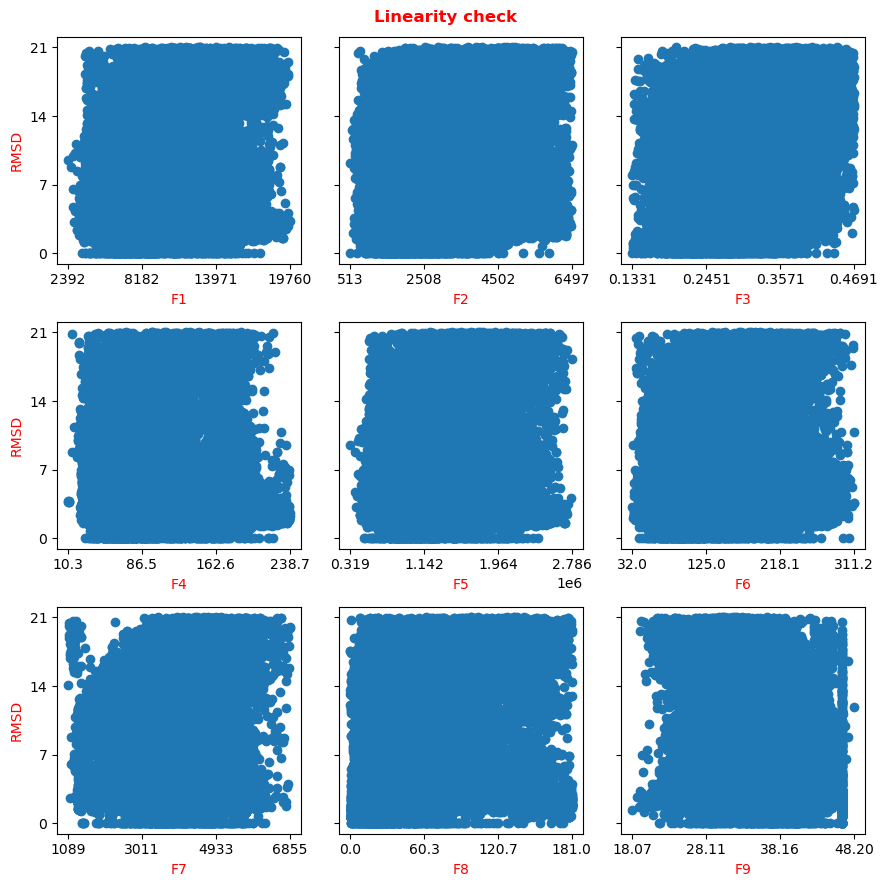

In [44]:
#Visualising linearity between independent and dependent variables#

fig, (axs1, axs2, axs3) = plt.subplots(figsize=(9,9), nrows= 3, ncols=3, sharey=True)
ax1,ax2,ax3 = axs1
ax4,ax5,ax6 = axs2
ax7,ax8,ax9 = axs3

plt.ticklabel_format(style='plain')

ax1.scatter(a1,y1)
ax1.set_xlabel('F1', c="r")
ax1.set_ylabel('RMSD',c="r")
xticks1 = np.linspace(start=min(a1), stop=max(a1), num=4)
yticks1 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(a2,y1)
ax2.set_xlabel('F2', c="r")
xticks2 = np.linspace(start=min(a2), stop=max(a2), num=4)
yticks2 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(a3,y1)
ax3.set_xlabel('F3', c="r")
xticks3 = np.linspace(start=min(a3), stop=max(a3), num=4)
yticks3 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

ax4.scatter(a4,y1)
ax4.set_xlabel('F4', c="r")
ax4.set_ylabel('RMSD',c="r")
xticks4 = np.linspace(start=min(a4), stop=max(a4), num=4)
yticks4 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax4.set_xticks(xticks4)
ax4.set_yticks(yticks4)

ax5.scatter(a5,y1)
ax5.set_xlabel('F5', c="r")
xticks5 = np.linspace(start=min(a5), stop=max(a5), num=4)
yticks5 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax5.set_xticks(xticks5)
ax5.set_yticks(yticks5)

ax6.scatter(a6,y1)
ax6.set_xlabel('F6', c="r")
xticks6 = np.linspace(start=min(a6), stop=max(a6), num=4)
yticks6 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax6.set_xticks(xticks6)
ax6.set_yticks(yticks6)

ax7.scatter(a7,y1)
ax7.set_xlabel('F7', c="r")
ax7.set_ylabel('RMSD',c="r")
xticks7 = np.linspace(start=min(a7), stop=max(a7), num=4)
yticks7 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax7.set_xticks(xticks7)
ax7.set_yticks(yticks7)

ax8.scatter(a8,y1)
ax8.set_xlabel('F8', c="r")
xticks8 = np.linspace(start=min(a8), stop=max(a8), num=4)
yticks8 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax8.set_xticks(xticks8)
ax8.set_yticks(yticks8)

ax9.scatter(a9,y1)
ax9.set_xlabel('F9', c="r")
xticks9 = np.linspace(start=min(a9), stop=max(a9), num=4)
yticks9 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax9.set_xticks(xticks9)
ax9.set_yticks(yticks9)

plt.suptitle("Linearity check", color='red', fontsize = 12, fontweight ="bold")
plt.tight_layout()
#plt.savefig('Images/Linearity_check_Model1.png',dpi=300,bbox_inches='tight')
plt.show()

## code for diagonal if needed


fig,ax=plt.subplots(figsize=(6,6))


ax.scatter(a1,y1)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, c="r", linewidth =2)
ax.set_xlabel('F1', c="r")
ax.set_ylabel('RMSD',c="r")
xticks1 = np.linspace(start=min(a1), stop=max(a1), num=4)
yticks1 = np.linspace(start=min(y1), stop=max(y1), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)
plt.show()

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


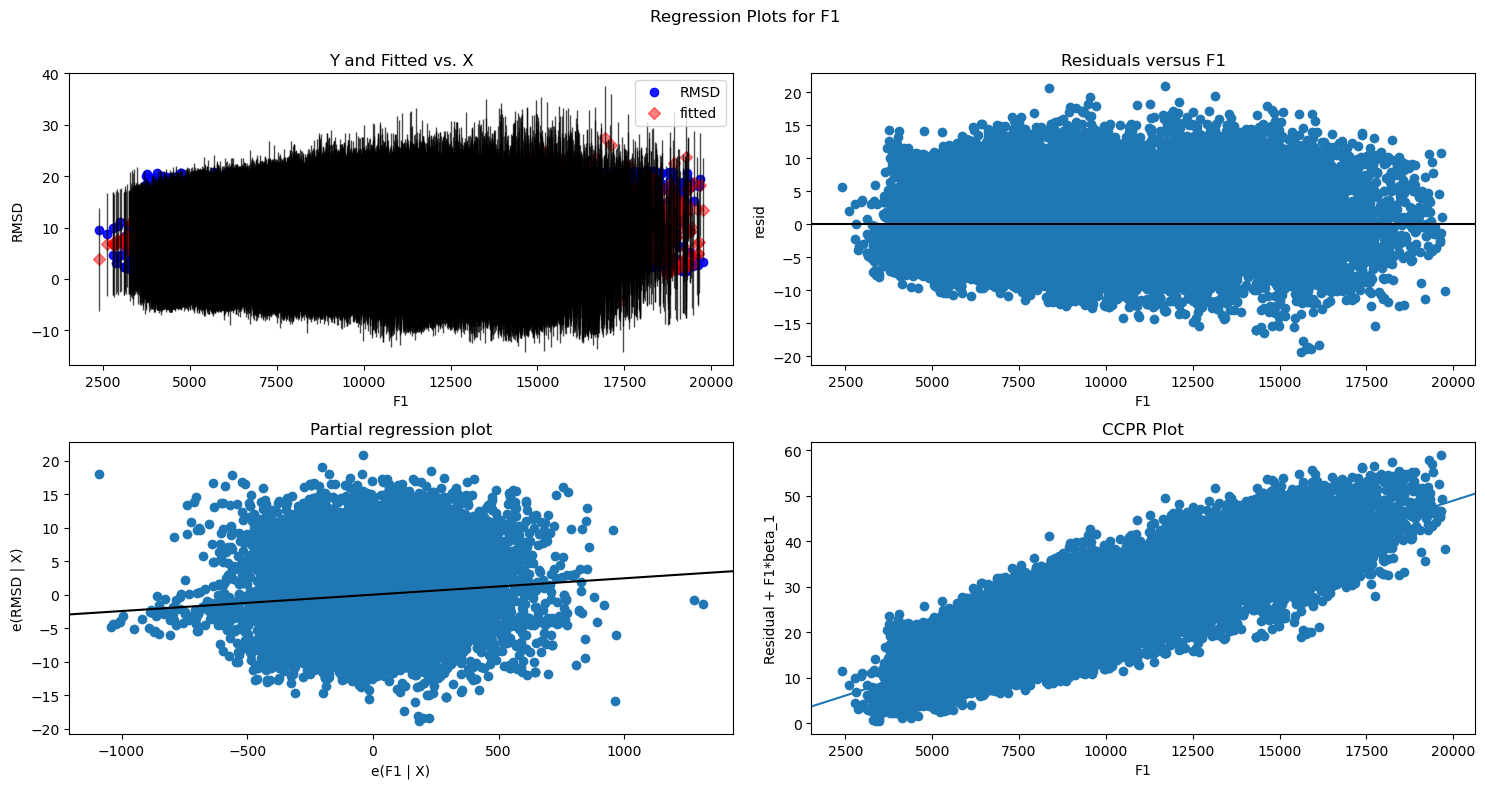

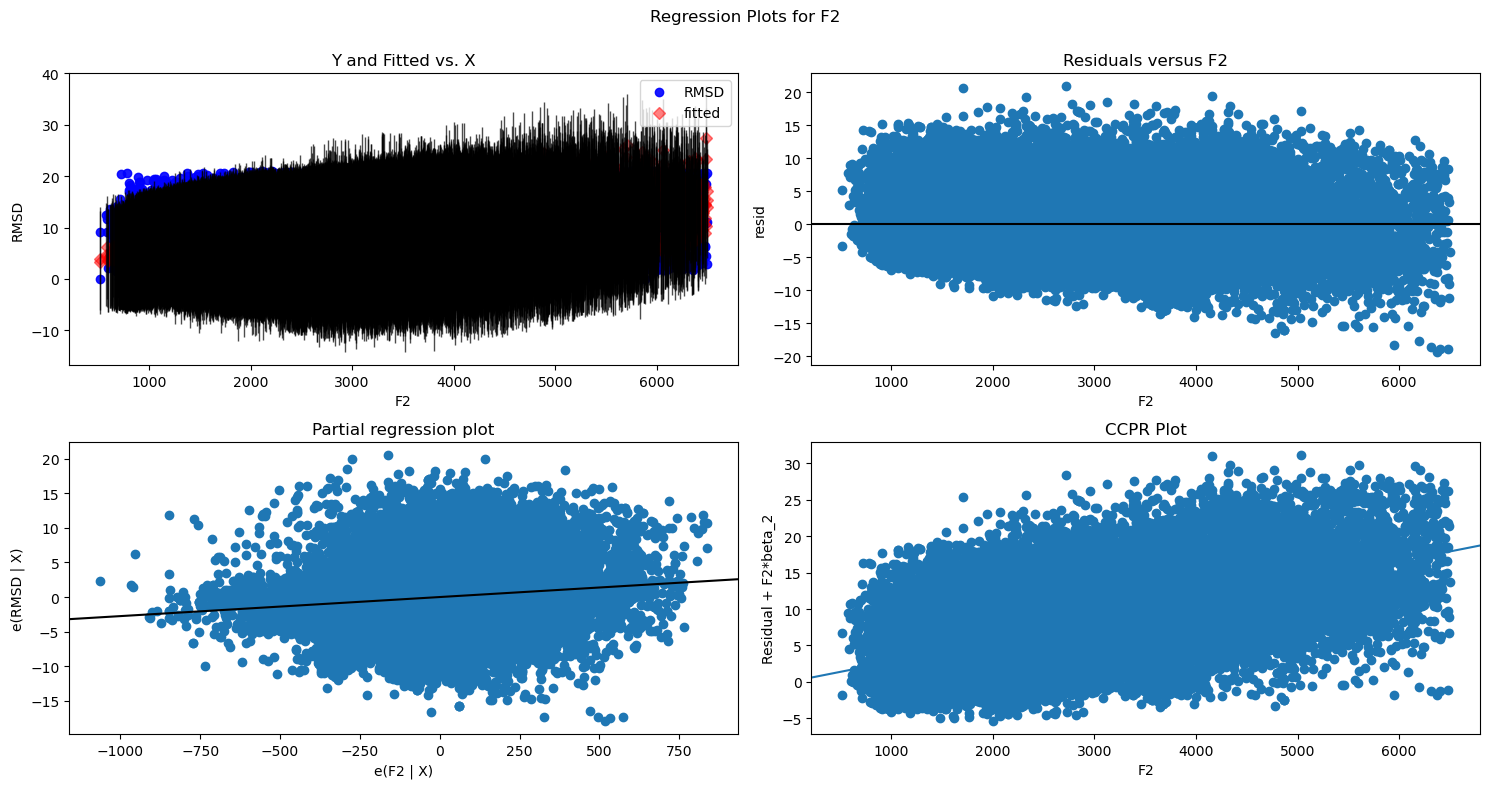

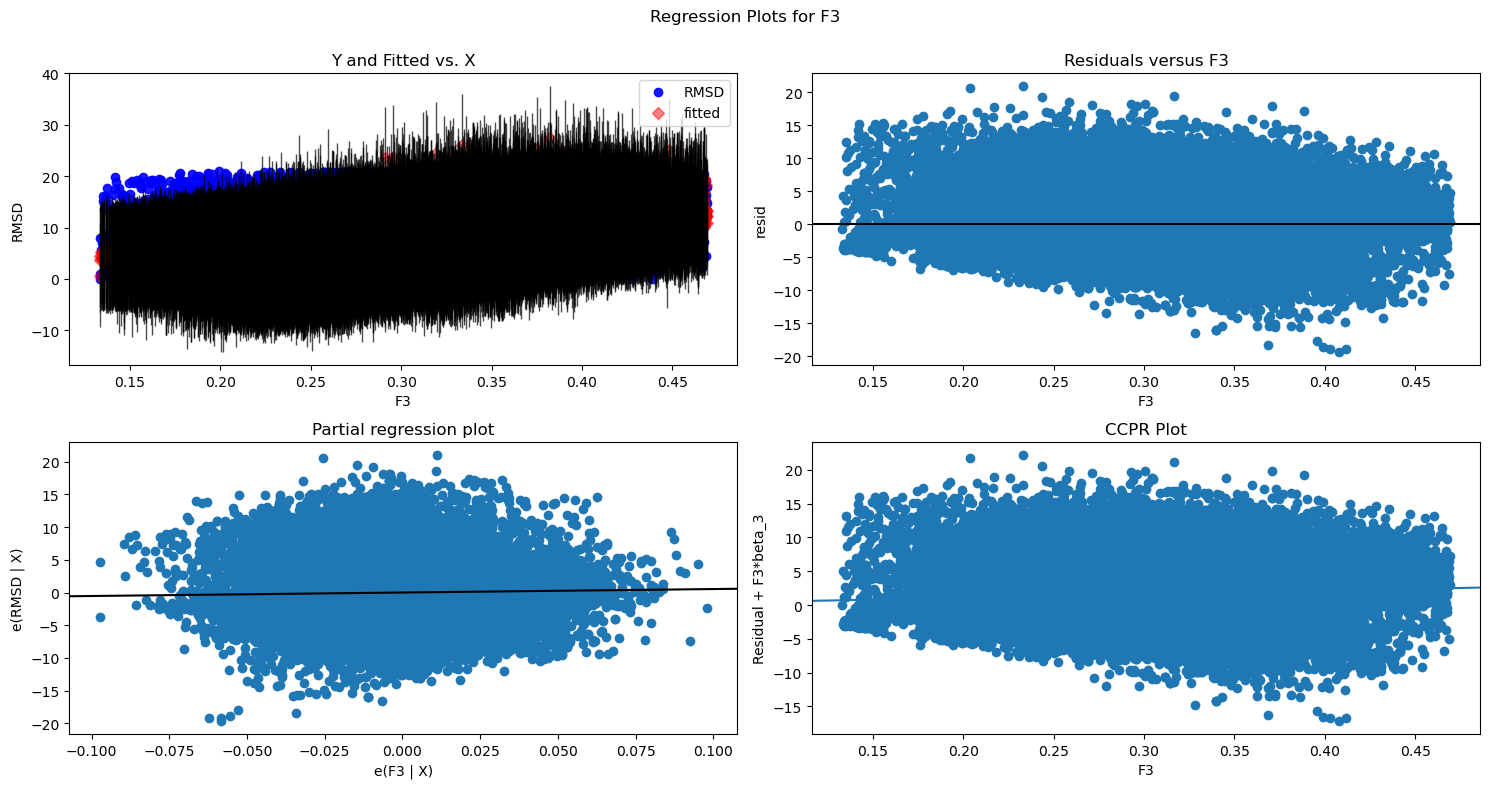

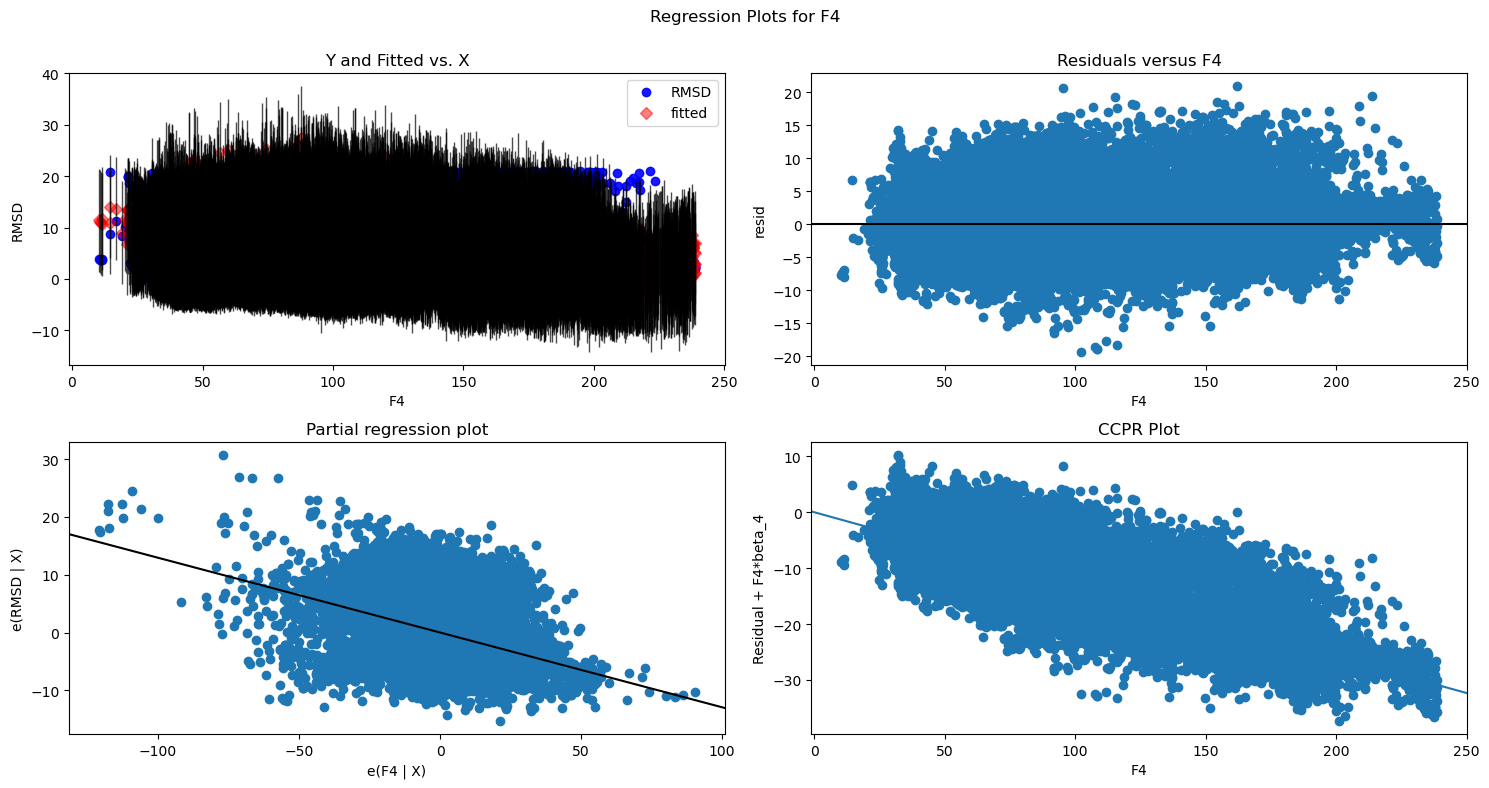

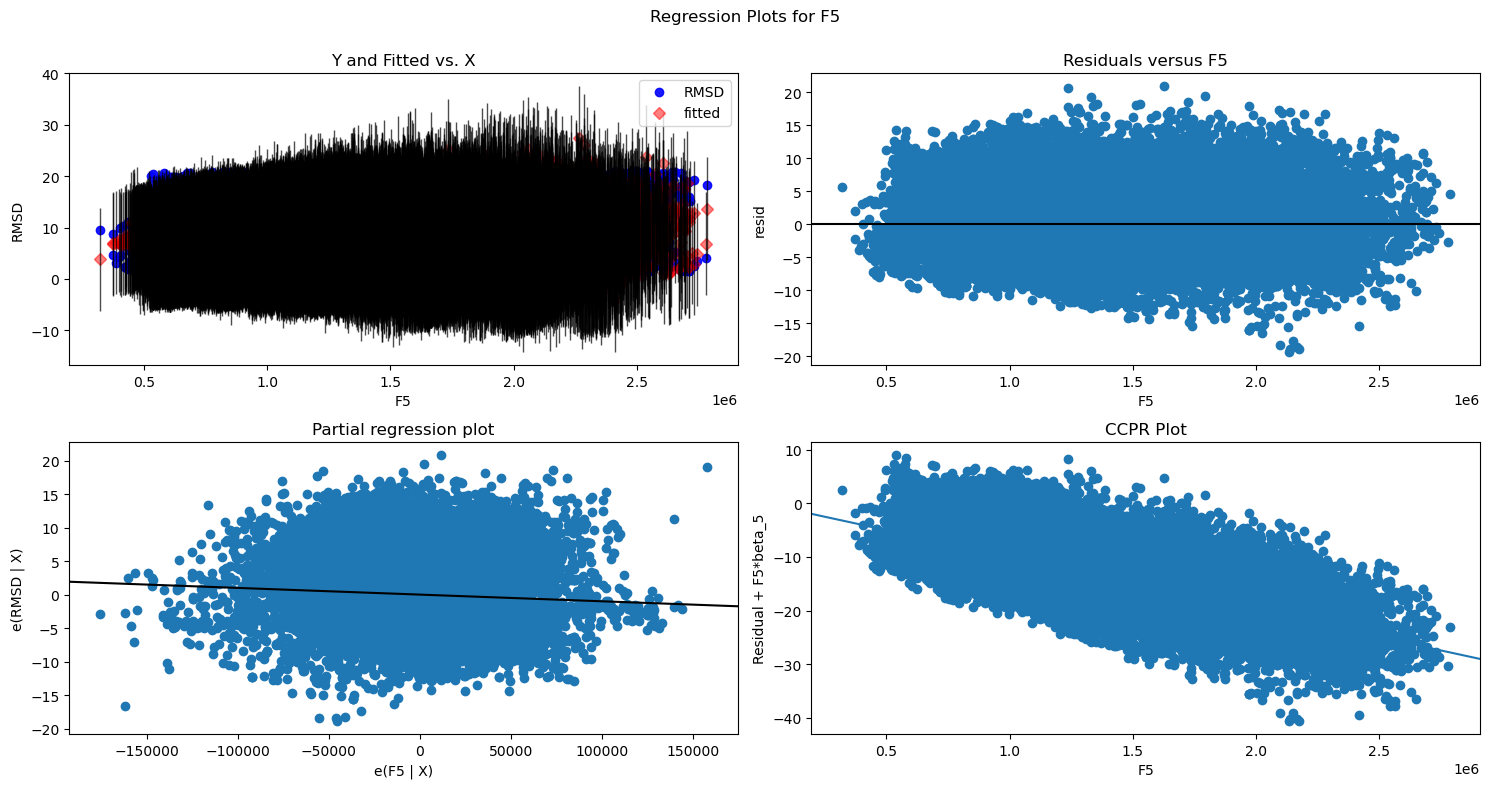

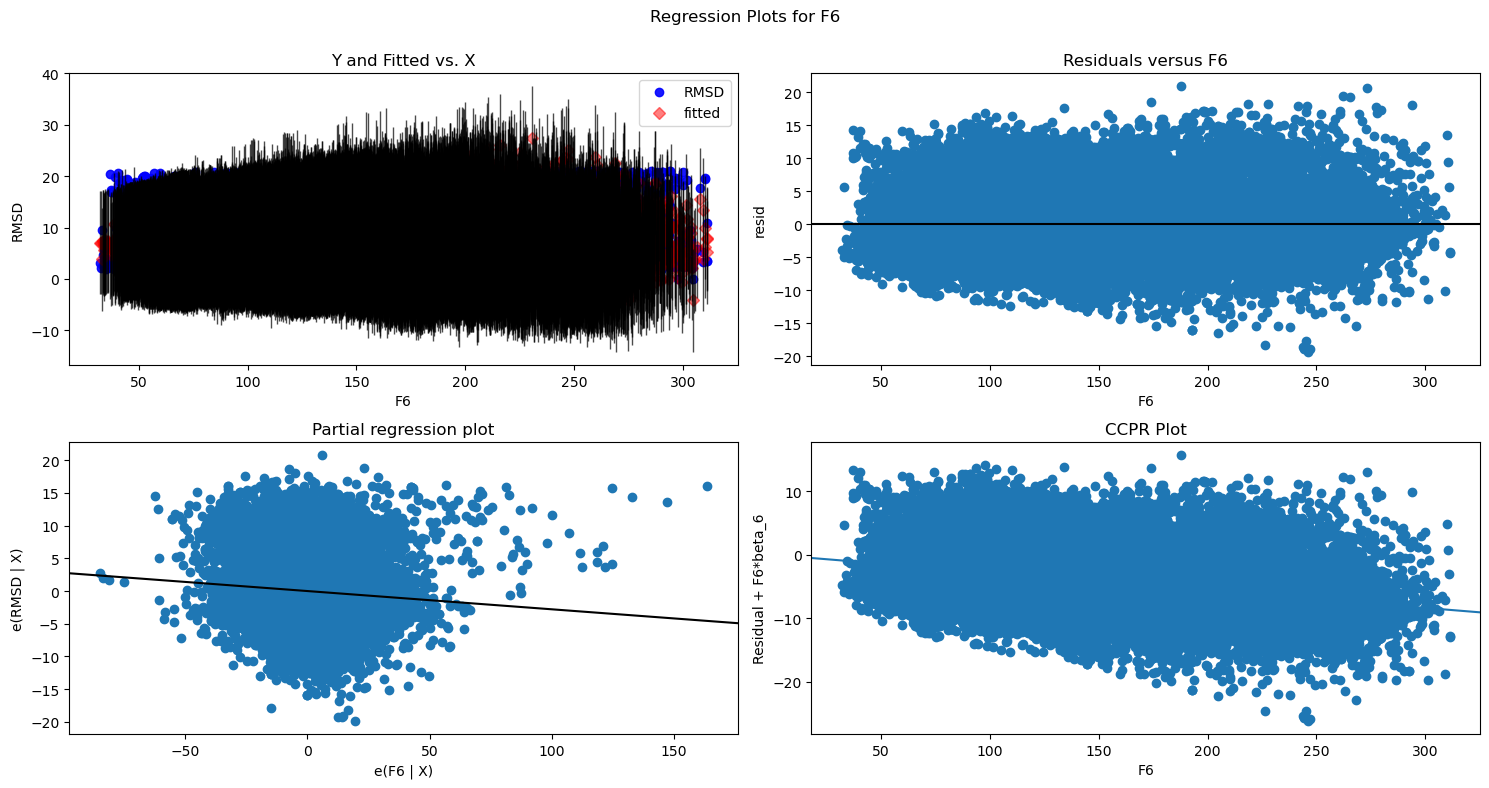

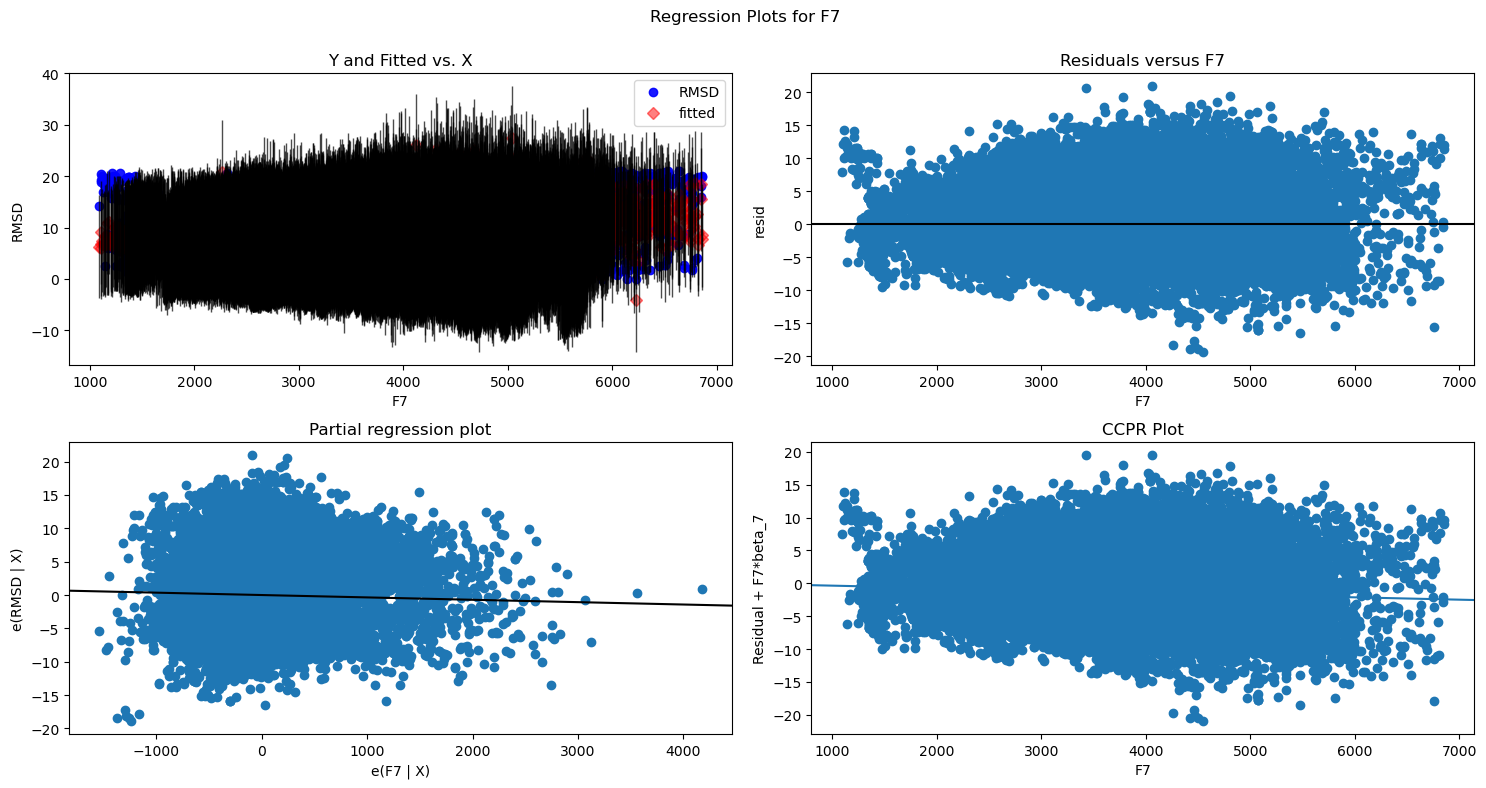

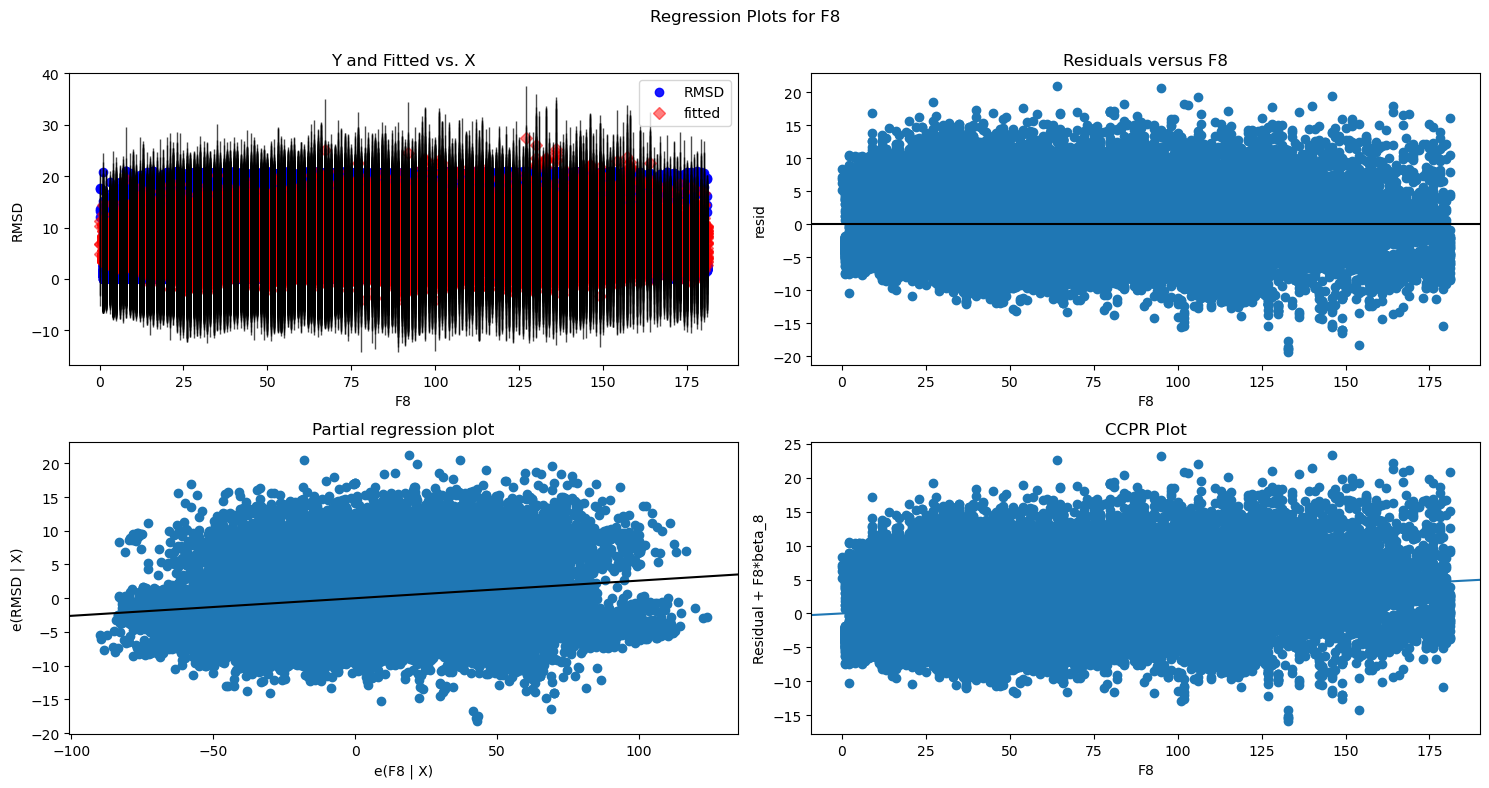

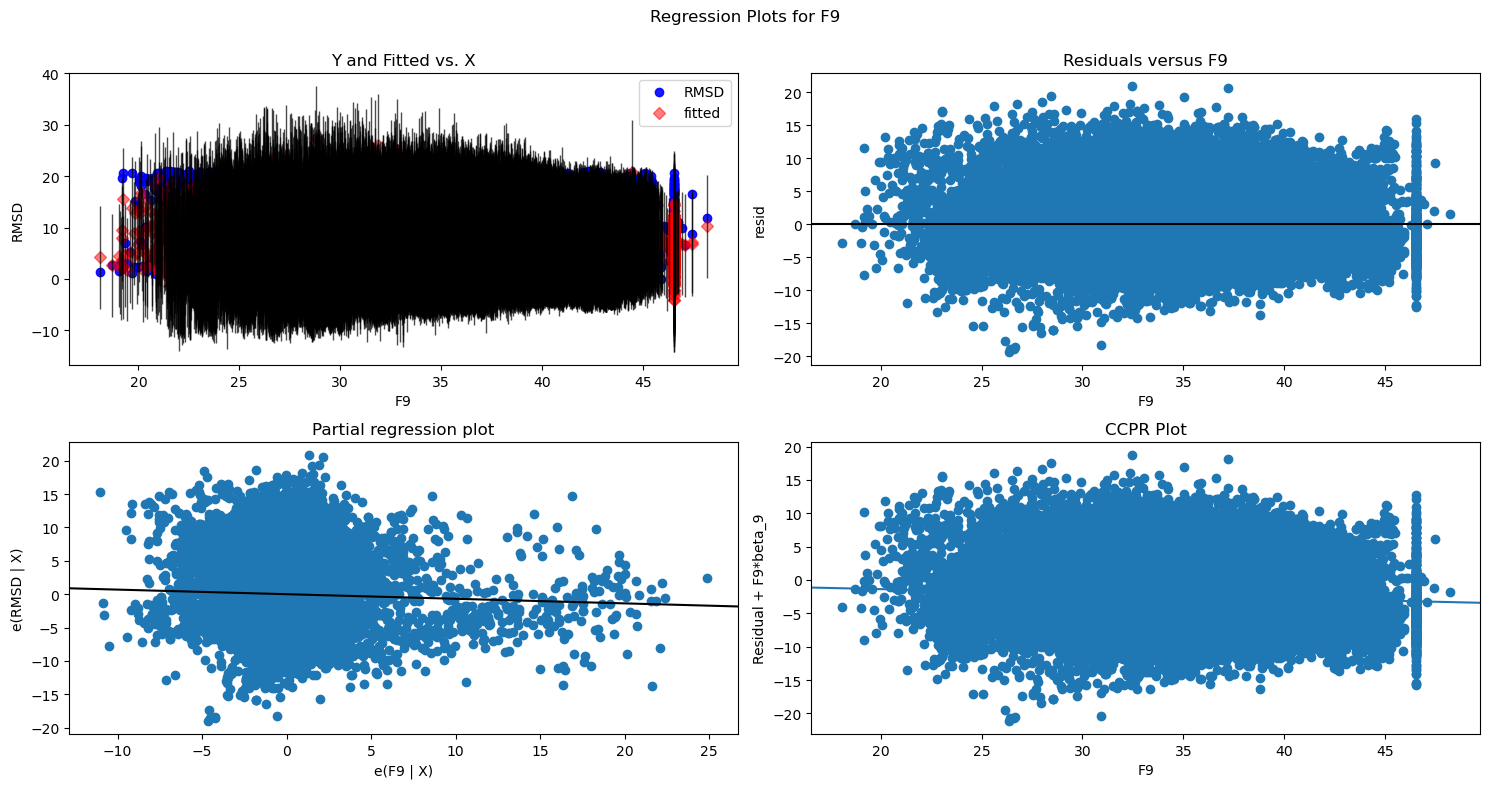

In [67]:
#Visualizing the error term for variance and skedasticity in baseline model#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F1",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F1.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F2",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F2.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F3",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F3.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F4",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F4.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F5",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F5.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F6",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F6.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F7",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F7.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F8",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F8.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model1, "F9",fig=fig)
#plt.savefig('Images/Var_sked_Model1_F9.png',dpi=300,bbox_inches='tight')

plt.show()

#### Normality check

C:\Users\ravin\AppData\Local\Temp\ipykernel_812\469260622.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


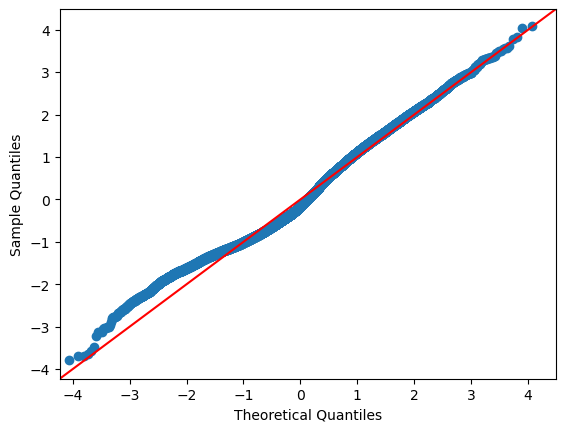

In [90]:
#Checking Normality assumption in baseline model by Q-Q plot#

residuals1 = model1.resid
fig = sm.graphics.qqplot(residuals1, dist=stats.norm, line='45', fit=True);
#plt.savefig('Images/Model1_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations - Baseline model
<p>
    <div align="justify">
        
1. The adjusted R-squared value of 0.618, the high F-Statistic and the corresponding significant p-values appear to indicate some linear relationship between the chosen independent and dependent variables, however, this may be misleading in a baseline model.
     <br>
     <br>
2. There is a combination of continuous and categorical variables. It is safe to say that "Floors', 'Condition' and 'Grade' are categorical variables and need to be transformed accordingly. Further, during the next iteration, one needs to see if 'Bedrooms' and 'Bathrooms' will also need to be considered categorical variables.
    <br>
    <br>
3. With the exception of 'Age', the distribution of all continuous variables appear to be heavily right-skewed, probably because of outliers (as can be seen from the scatter plots). Outliers will need to be eliminated.
    <br>
    <br>
4. It appears that the homoskedasticity and normality assumptions cannot be satisfied in this iteration, given the skew of the Q-Q plot and the high values for the JB test, kurtosis and skewness.
    </div>

### Step 3: Model 2 (Iteration 2)
<p>
<div align="justify">
Check for multicollinearity, transform variables, render revised model and retest assumptions of regression in the new model.
    </div>

#### Multicollinearity check
Check for multicollinearity and drop columns as required.

C:\Users\ravin\AppData\Local\Temp\ipykernel_812\3434615346.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


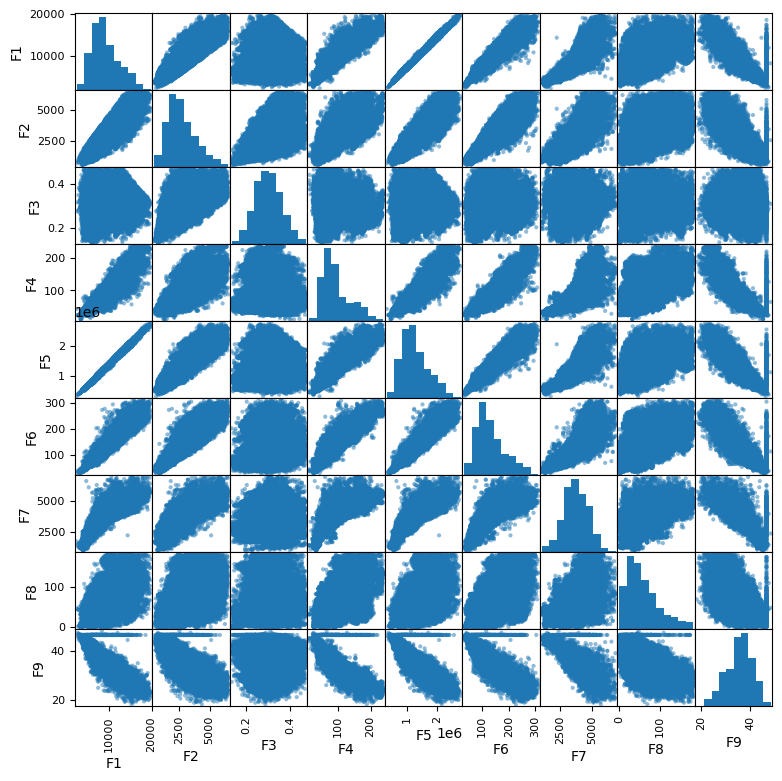

In [91]:
# Checking for multicollinearity with scatter matrix#

df2a=df2.iloc[:,1:10]
pd.plotting.scatter_matrix(df2a,figsize = [9,9]);
plt.suptitle("Scatter matrix to check multicollinearity", c="r", fontsize = 14, fontweight ="bold")
#plt.savefig('Images/Multicoll_scatter_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

<div align ="justify">
It appears that there is definitely correlation between certain variables so it is advisable to look at the correlation matrix and check for correlations greater than 0.75 before deciding to drop columns.
    </div>

In [92]:
#Creating correlation matrix#
df2a.corr()

F1        F2        F3        F4        F5        F6        F7  \
F1  1.000000  0.873979  0.099762  0.924580  0.997612  0.955536  0.881029   
F2  0.873979  1.000000  0.544233  0.756764  0.870333  0.878514  0.767933   
F3  0.099762  0.544233  1.000000  0.004246  0.097498  0.186107  0.078416   
F4  0.924580  0.756764  0.004246  1.000000  0.918710  0.931806  0.811636   
F5  0.997612  0.870333  0.097498  0.918710  1.000000  0.947902  0.878615   
F6  0.955536  0.878514  0.186107  0.931806  0.947902  1.000000  0.837585   
F7  0.881029  0.767933  0.078416  0.811636  0.878615  0.837585  1.000000   
F8  0.545494  0.487070  0.094231  0.547207  0.541300  0.556446  0.500373   
F9 -0.899317 -0.765412 -0.051498 -0.878975 -0.897541 -0.874451 -0.891432   

          F8        F9  
F1  0.545494 -0.899317  
F2  0.487070 -0.765412  
F3  0.094231 -0.051498  
F4  0.547207 -0.878975  
F5  0.541300 -0.897541  
F6  0.556446 -0.874451  
F7  0.500373 -0.891432  
F8  1.000000 -0.538802  
F9 -0.538802  1.000000

In [93]:
#Checking for correlations that are greater than 0.75 in the correlation matrix#
abs(df2a.corr()) > 0.75

F1     F2     F3     F4     F5     F6     F7     F8     F9
F1   True   True  False   True   True   True   True  False   True
F2   True   True  False   True   True   True   True  False   True
F3  False  False   True  False  False  False  False  False  False
F4   True   True  False   True   True   True   True  False   True
F5   True   True  False   True   True   True   True  False   True
F6   True   True  False   True   True   True   True  False   True
F7   True   True  False   True   True   True   True  False   True
F8  False  False  False  False  False  False  False   True  False
F9   True   True  False   True   True   True   True  False   True

In [95]:
# Return any highly correlated pairs that are present in a new dataframe#

df2b=df2a.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df2b['Pairs'] = list(zip(df2b.level_0, df2b.level_1))
df2b.set_index(['Pairs'], inplace = True)
df2b.drop(columns=['level_1', 'level_0'], inplace = True)
df2b.columns = ['Corr']

df2b[(df2b.Corr>.75) & (df2b.Corr <1)]

Corr
Pairs             
(F1, F5)  0.997612
(F5, F1)  0.997612
(F6, F1)  0.955536
(F1, F6)  0.955536
(F6, F5)  0.947902
(F5, F6)  0.947902
(F6, F4)  0.931806
(F4, F6)  0.931806
(F4, F1)  0.924580
(F1, F4)  0.924580
(F5, F4)  0.918710
(F4, F5)  0.918710
(F9, F1)  0.899317
(F1, F9)  0.899317
(F5, F9)  0.897541
(F9, F5)  0.897541
(F9, F7)  0.891432
(F7, F9)  0.891432
(F7, F1)  0.881029
(F1, F7)  0.881029
(F9, F4)  0.878975
(F4, F9)  0.878975
(F7, F5)  0.878615
(F5, F7)  0.878615
(F2, F6)  0.878514
(F6, F2)  0.878514
(F9, F6)  0.874451
(F6, F9)  0.874451
(F1, F2)  0.873979
(F2, F1)  0.873979
(F2, F5)  0.870333
(F5, F2)  0.870333
(F7, F6)  0.837585
(F6, F7)  0.837585
(F7, F4)  0.811636
(F4, F7)  0.811636
(F7, F2)  0.767933
(F2, F7)  0.767933
(F2, F9)  0.765412
(F9, F2)  0.765412
(F4, F2)  0.756764
(F2, F4)  0.756764

<div align="justify">
Here I choose to remove both highly correlated columns (Condition 3 and Condition 4) so as to further reduce the number of categorical variables in future analyses.
    </div>

In [28]:
#Creating a new dataframe after dropping the highly correlated columns#

df2c=df2a.drop(columns=['Cond_3','Cond_4'], axis=1)
df2c.head()

Price  Living_area  Lot_area  Age  Bed_3  Bed_4  Bed_5  Bath_1.0  \
0  221900.0         1180      5650   68      1      0      0         1   
1  538000.0         2570      7242   72      1      0      0         0   
2  180000.0          770     10000   90      0      0      0         1   
3  604000.0         1960      5000   58      0      1      0         0   
4  510000.0         1680      8080   36      1      0      0         0   

   Bath_1.5  Bath_2.0  ...  Flr_3.5  Cond_2  Cond_5  Grd_5  Grd_6  Grd_7  \
0         0         0  ...        0       0       0      0      0      1   
1         0         0  ...        0       0       0      0      0      1   
2         0         0  ...        0       0       0      0      1      0   
3         0         0  ...        0       0       1      0      0      1   
4         0         1  ...        0       0       0      0      0      0   

   Grd_8  Grd_9  Grd_10  Grd_11  
0      0      0       0       0  
1      0      0       0       0  
2      0      0       0       0  
3      0      0       0       0  
4      1      0       0       0  

[5 rows x 27 columns]

In [29]:
df2d.isna().values.any()

False

In [30]:
df2d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        17703 non-null  float64
 1   Living_area  17703 non-null  int64  
 2   Lot_area     17703 non-null  int64  
 3   Age          17703 non-null  int64  
 4   Bed_3        17703 non-null  uint8  
 5   Bed_4        17703 non-null  uint8  
 6   Bed_5        17703 non-null  uint8  
 7   Bath_1.0     17703 non-null  uint8  
 8   Bath_1.5     17703 non-null  uint8  
 9   Bath_2.0     17703 non-null  uint8  
 10  Bath_2.5     17703 non-null  uint8  
 11  Bath_3.0     17703 non-null  uint8  
 12  Bath_3.5     17703 non-null  uint8  
 13  Flr_1.5      17703 non-null  uint8  
 14  Flr_2.0      17703 non-null  uint8  
 15  Flr_2.5      17703 non-null  uint8  
 16  Flr_3.0      17703 non-null  uint8  
 17  Flr_3.5      17703 non-null  uint8  
 18  Cond_2       17703 non-null  uint8  
 19  Cond

In [31]:
df2d.shape

(17703, 27)

#### Log transformation of independent variables

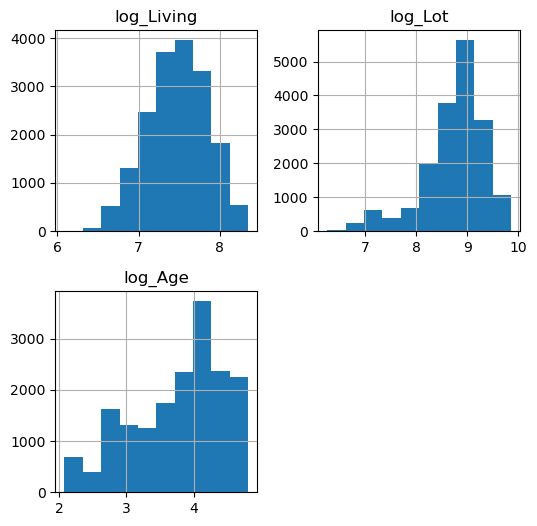

In [32]:
#Visualising log transformations of independent variables with histograms#

df2d_log=pd.DataFrame([])
df2d_log['log_Living'] = np.log(df2d['Living_area'])
df2d_log['log_Lot'] = np.log(df2d['Lot_area'])
df2d_log['log_Age'] = np.log(df2d['Age'])
df2d_log.hist(figsize  = [6, 6]);
plt.savefig('Images/Log_transform_hist.png',dpi=300,bbox_inches='tight')

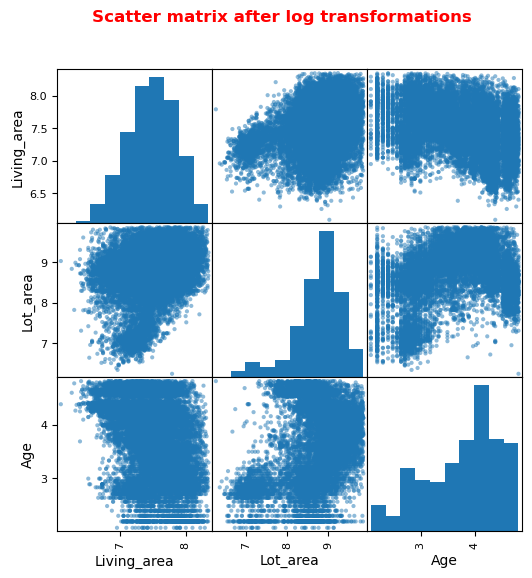

In [33]:
#Performing log transformation of independent variables within the dataframe#

var_log = ['Living_area', 'Lot_area','Age']
for feat in var_log:
    df2d[feat] = df2d[feat].map(lambda x: np.log(x))
pd.plotting.scatter_matrix(df2d[var_log], figsize=(6,6));
plt.suptitle("Scatter matrix after log transformations", c="r", fontsize = 12, fontweight ="bold")
plt.savefig('Images/Log_transform_scatter_matrix.png',dpi=300,bbox_inches='tight')
plt.show()

In [34]:
df2d.head()

Price  Living_area  Lot_area       Age  Bed_3  Bed_4  Bed_5  Bath_1.0  \
0  221900.0     7.073270  8.639411  4.219508      1      0      0         1   
1  538000.0     7.851661  8.887653  4.276666      1      0      0         0   
2  180000.0     6.646391  9.210340  4.499810      0      0      0         1   
3  604000.0     7.580700  8.517193  4.060443      0      1      0         0   
4  510000.0     7.426549  8.997147  3.583519      1      0      0         0   

   Bath_1.5  Bath_2.0  ...  Flr_3.5  Cond_2  Cond_5  Grd_5  Grd_6  Grd_7  \
0         0         0  ...        0       0       0      0      0      1   
1         0         0  ...        0       0       0      0      0      1   
2         0         0  ...        0       0       0      0      1      0   
3         0         0  ...        0       0       1      0      0      1   
4         0         1  ...        0       0       0      0      0      0   

   Grd_8  Grd_9  Grd_10  Grd_11  
0      0      0       0       0  
1      0      0       0       0  
2      0      0       0       0  
3      0      0       0       0  
4      1      0       0       0  

[5 rows x 27 columns]

#### Model 2

In [35]:
#Running a new model to see if there are any improvements#

X2 = df2d.drop('Price', axis=1)
y2 = df2d['Price']
X2_int = sm.add_constant(X2)
model2 = sm.OLS(y2,X2_int).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.539
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     793.5
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:34:05   Log-Likelihood:            -2.3439e+05
No. Observations:               17703   AIC:                         4.688e+05
Df Residuals:                   17676   BIC:                         4.690e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.272e+06   5.64e+04    -22.565      0.000   -1.38e+06   -1.16e+06
Living_area  2.428e+05   5363.035     45.279      0.000    2.32e+05    2.53e+05
Lot_area    -6.957e+04   2331.867    -29.836      0.000   -7.41e+04    -6.5e+04
Age          1.078e+05   2398.003     44.973      0.000    1.03e+05    1.13e+05
Bed_3       -4.237e+04   3519.801    -12.036      0.000   -4.93e+04   -3.55e+04
Bed_4       -5.042e+04   4272.505    -11.800      0.000   -5.88e+04    -4.2e+04
Bed_5       -4.962e+04   5924.508     -8.375      0.000   -6.12e+04    -3.8e+04
Bath_1.0      336.5176   3898.211      0.086      0.931   -7304.358    7977.393
Bath_1.5    -1.828e+04   4339.078     -4.212      0.000   -2.68e+04   -9770.599
Bath_2.0    -8286.3994   3820.978     -2.169      0.030   -1.58e+04    -796.908
Bath_2.5    -1.506e+04   3079.291     -4.892      0.000   -2.11e+04   -9027.381
Bath_3.0     2546.6310   6352.150      0.401      0.688   -9904.207     1.5e+04
Bath_3.5     5.455e+04   7321.492      7.450      0.000    4.02e+04    6.89e+04
Flr_1.5       2.16e+04   4045.951      5.339      0.000    1.37e+04    2.95e+04
Flr_2.0      2539.4420   3370.846      0.753      0.451   -4067.747    9146.631
Flr_2.5      2.277e+04   1.51e+04      1.509      0.131   -6801.002    5.23e+04
Flr_3.0       3.41e+04   7486.617      4.554      0.000    1.94e+04    4.88e+04
Flr_3.5      1.989e+04   5.59e+04      0.356      0.722   -8.96e+04    1.29e+05
Cond_2      -4.788e+04   1.26e+04     -3.814      0.000   -7.25e+04   -2.33e+04
Cond_5       4.297e+04   3948.579     10.883      0.000    3.52e+04    5.07e+04
Grd_5       -9308.5038   4.44e+04     -0.210      0.834   -9.64e+04    7.78e+04
Grd_6        2.691e+04   4.33e+04      0.621      0.534    -5.8e+04    1.12e+05
Grd_7        1.006e+05   4.33e+04      2.324      0.020    1.57e+04    1.85e+05
Grd_8        2.035e+05   4.34e+04      4.689      0.000    1.18e+05    2.89e+05
Grd_9        3.548e+05   4.36e+04      8.136      0.000    2.69e+05     4.4e+05
Grd_10       4.415e+05    4.4e+04     10.026      0.000    3.55e+05    5.28e+05
Grd_11       5.333e+05   4.76e+04     11.213      0.000     4.4e+05    6.26e+05
==============================================================================
Omnibus:                      879.812   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1262.180
Skew:                           0.461   Prob(JB):                    8.34e-275
Kurtosis:                       3.928   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or o

### Testing assumptions of regression - Model 2
<p>
    <div align="justify">
 Check whether Model 2 satisfies the assumptions of linearity, homoskedasticity and normality.
        </div>

#### Linearity check

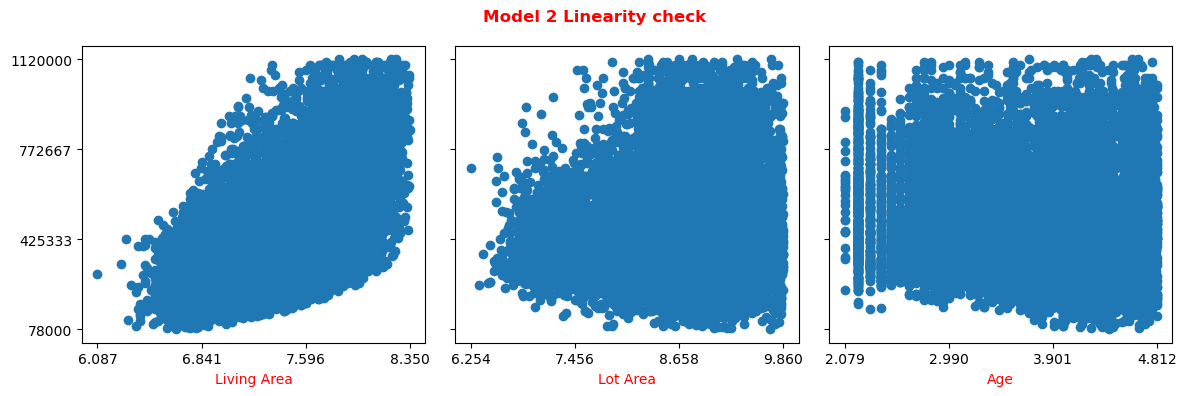

In [36]:
#Visualising linearity between independent and dependent variables in Model 2#

fig, (ax1, ax2,ax3) = plt.subplots(figsize=(12,4), nrows= 1, ncols=3, sharey=True)

y3=df2d.Price
b1=df2d.Living_area
b2=df2d.Lot_area
b3=df2d.Age

plt.ticklabel_format(style='plain')

ax1.scatter(b1,y3)
ax1.set_xlabel(('Living Area'), c="r")
xticks1 = np.linspace(start=min(b1), stop=max(b1), num=4)
yticks1 = np.linspace(start=min(y3), stop=max(y3), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(b2,y3)
ax2.set_xlabel(('Lot Area'), c="r")
xticks2 = np.linspace(start=min(b2), stop=max(b2), num=4)
yticks2 = np.linspace(start=min(y3), stop=max(y3), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(b3,y3)
ax3.set_xlabel(('Age'), c="r")
xticks3 = np.linspace(start=min(b3), stop=max(b3), num=4)
yticks3 = np.linspace(start=min(y3), stop=max(y3), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

plt.suptitle("Model 2 Linearity check", c="r", fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Model2_Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1


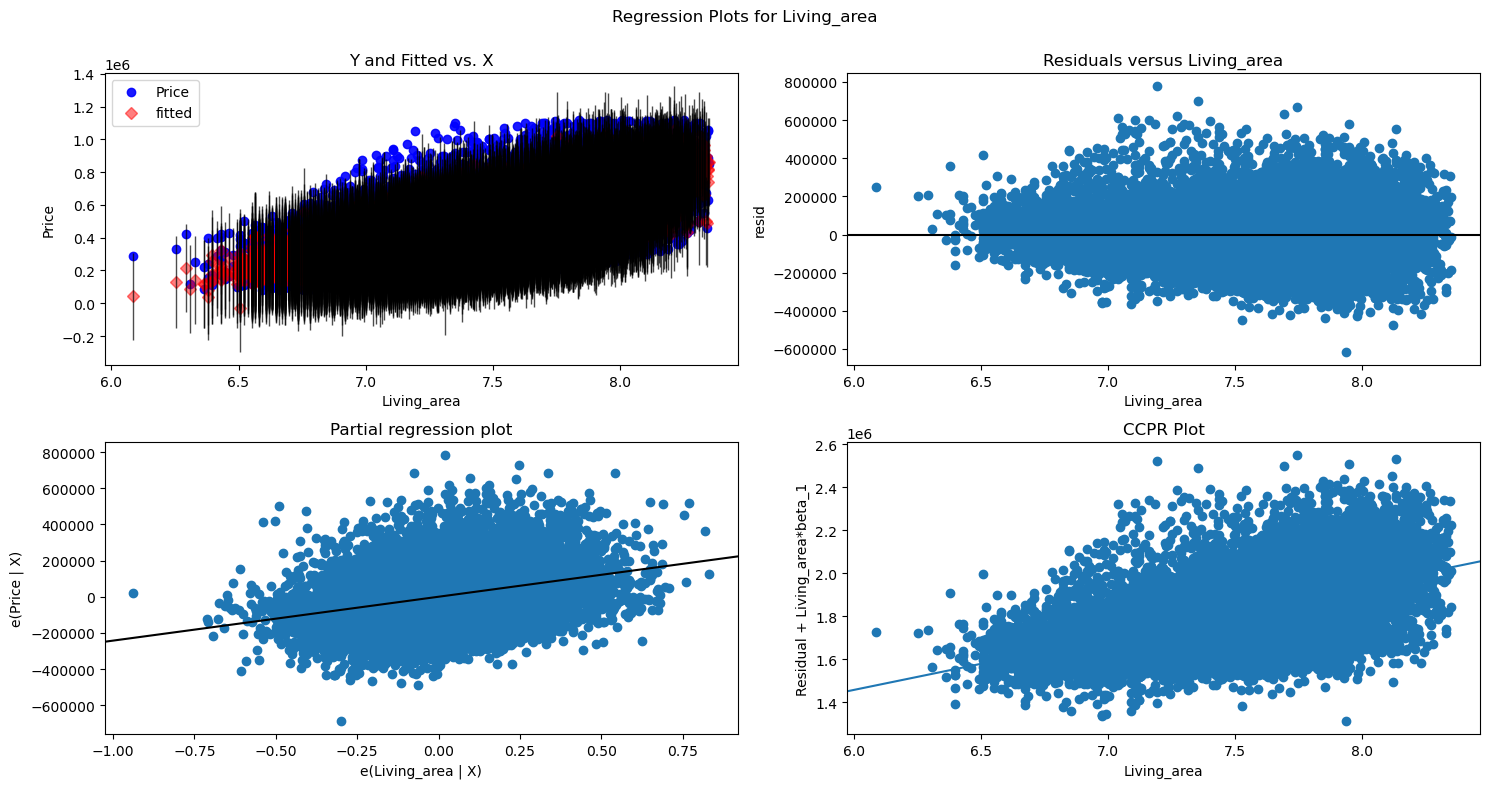

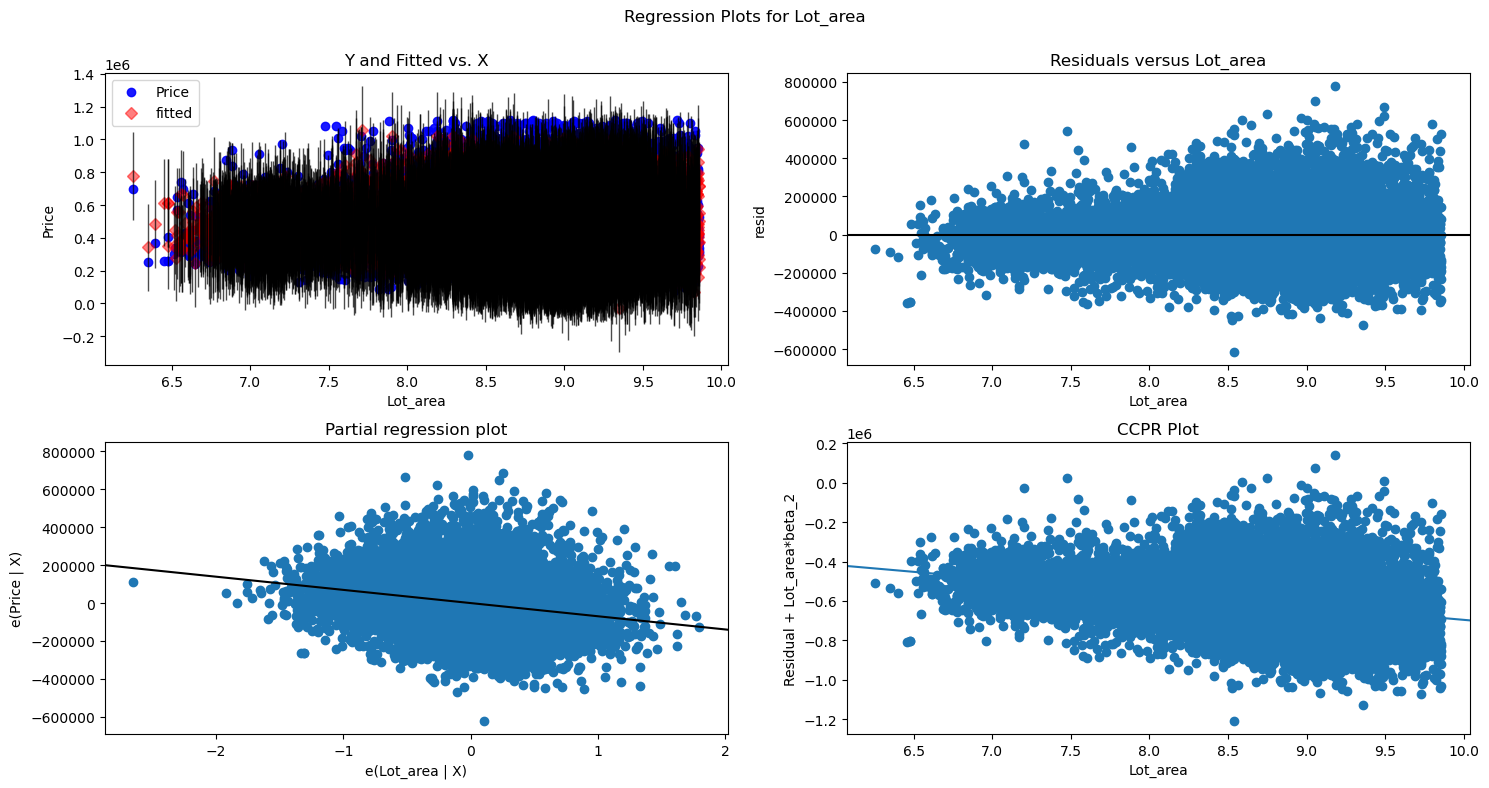

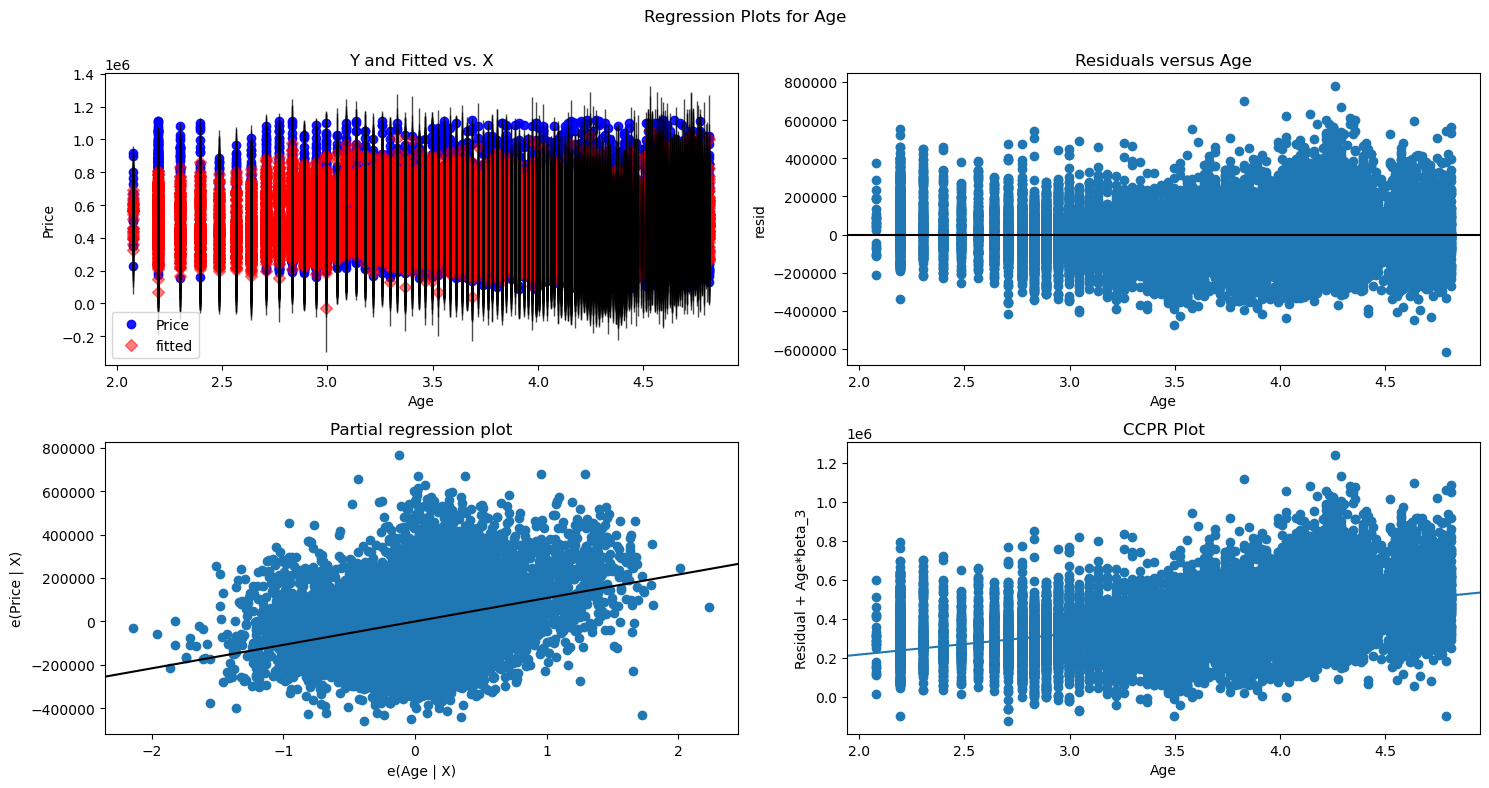

In [37]:
#Visualizing the error term for variance and skedasticity in Model 2#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Living_area", fig=fig)
plt.savefig('Images/Var_sked_Model2_Living_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Lot_area",fig=fig)
plt.savefig('Images/Var_sked_Model2_Lot_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model2, "Age",fig=fig)
plt.savefig('Images/Var_sked_Model2_Age.png',dpi=300,bbox_inches='tight')

plt.show()

#### Normality check

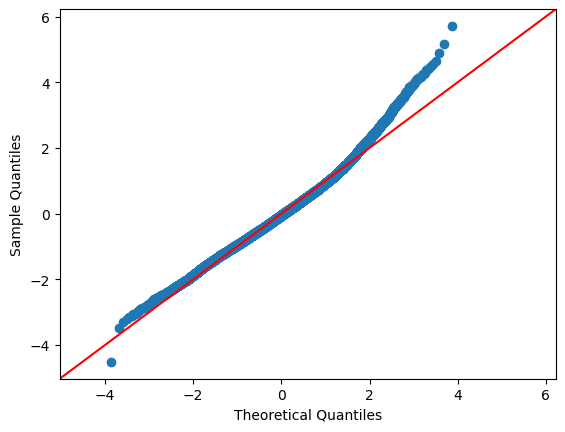

In [38]:
#Checking Normality assumption in Model 2 by Q-Q plot#

residuals2 = model2.resid
fig = sm.graphics.qqplot(residuals2, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model2_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations: Model 2
<p>
    <div align = "justify">
        
1. The adjusted R-squared value has reduced, however there may still be linearity between the dependent and the three independent variables.
    <br>
    <br>
2. The skew and kurtosis values have reduced dramatically and are closer to values representing normal distribution.
    <br>
    <br>
3. There are a few categorical variables whose p-values indicate that they are not significant and can be eliminated in the next iteration.
    <br>
    <br>
4. 'Living area' appears to show some linearity with 'Price', but the linear relationship between 'Price' and 'Lot_area' and 'Age' is still not well-defined.
    <br>
    <br>
5. 'Living area' and 'Lot area' still show heteroskedasticity, whilst 'Age' appears to show homoskedasticity.
    <br>
    <br>
6. The normality plot has improved and shows a more linear relationship between Theoretical and Sample quantiles, indicating that further tweaking of the model might improve this feature.
            </div>          

### Step 4: Model 3 (Iteration 3) and Model 4 (Iteration 4)
<p>
     <div align="justify">
Eliminate non-significant variables, perform feature scaling, render revised model(s), choose the best model and retest assumptions of regression.<br>
         <br>
<b>Notes:</b> 
         <br>
For Model 3, I chose to remove columns of categorical variables that were shown (in Model 2) not to be significantly related to the dependent variable and included three from the 'Floors' category. The number of floors might also not generally factor in property purchase decisions (exceptions include but are not limited to people who are differently-abled or those looking for office space). Given that the dataset did not include or indicate those factors, I decided to remove the "Floors' set of variables and ran the model.
         <br>
         <br>
For Model 4, I performed mean normalisation on the independent variables and ran a new model.
         </div>

In [39]:
#Removing columns that are not significantly related to the dependent variable and creating a new dataframe#

df2e=df2d.drop(columns=['Bath_1.0','Bath_3.0','Flr_1.5','Flr_2.0','Flr_2.5','Flr_3.0','Flr_3.5','Grd_5','Grd_6'],axis=1)
df2e.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17703 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Price        17703 non-null  float64
 1   Living_area  17703 non-null  float64
 2   Lot_area     17703 non-null  float64
 3   Age          17703 non-null  float64
 4   Bed_3        17703 non-null  uint8  
 5   Bed_4        17703 non-null  uint8  
 6   Bed_5        17703 non-null  uint8  
 7   Bath_1.5     17703 non-null  uint8  
 8   Bath_2.0     17703 non-null  uint8  
 9   Bath_2.5     17703 non-null  uint8  
 10  Bath_3.5     17703 non-null  uint8  
 11  Cond_2       17703 non-null  uint8  
 12  Cond_5       17703 non-null  uint8  
 13  Grd_7        17703 non-null  uint8  
 14  Grd_8        17703 non-null  uint8  
 15  Grd_9        17703 non-null  uint8  
 16  Grd_10       17703 non-null  uint8  
 17  Grd_11       17703 non-null  uint8  
dtypes: float64(4), uint8(14)
memory usage: 933.6 K

In [40]:
#Running a new model to test whether removal of columns changes results#
#Model 3#

X3 = df2e.drop('Price', axis=1)
y3 = df2e['Price']
X3_int = sm.add_constant(X3)
model3 = sm.OLS(y3,X3_int).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1206.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:34:48   Log-Likelihood:            -2.3442e+05
No. Observations:               17703   AIC:                         4.689e+05
Df Residuals:                   17685   BIC:                         4.690e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.209e+06   3.39e+04    -35.632      0.000   -1.28e+06   -1.14e+06
Living_area  2.451e+05   4859.312     50.442      0.000    2.36e+05    2.55e+05
Lot_area     -7.66e+04   2004.671    -38.212      0.000   -8.05e+04   -7.27e+04
Age          1.098e+05   2059.127     53.327      0.000    1.06e+05    1.14e+05
Bed_3       -3.898e+04   3456.235    -11.279      0.000   -4.58e+04   -3.22e+04
Bed_4       -4.662e+04   4210.764    -11.073      0.000   -5.49e+04   -3.84e+04
Bed_5       -4.551e+04   5867.379     -7.757      0.000    -5.7e+04    -3.4e+04
Bath_1.5    -1.758e+04   4045.778     -4.346      0.000   -2.55e+04   -9651.724
Bath_2.0    -8147.7104   3600.259     -2.263      0.024   -1.52e+04   -1090.849
Bath_2.5    -1.591e+04   2888.735     -5.507      0.000   -2.16e+04   -1.02e+04
Bath_3.5      5.32e+04   7240.209      7.347      0.000     3.9e+04    6.74e+04
Cond_2      -4.971e+04   1.26e+04     -3.957      0.000   -7.43e+04   -2.51e+04
Cond_5       4.313e+04   3938.708     10.951      0.000    3.54e+04    5.09e+04
Grd_7        7.563e+04   3811.218     19.844      0.000    6.82e+04    8.31e+04
Grd_8        1.797e+05   4595.740     39.093      0.000    1.71e+05    1.89e+05
Grd_9        3.312e+05   5900.052     56.136      0.000     3.2e+05    3.43e+05
Grd_10       4.189e+05   8353.619     50.140      0.000    4.02e+05    4.35e+05
Grd_11        5.12e+05   1.98e+04     25.905      0.000    4.73e+05    5.51e+05
==============================================================================
Omnibus:                      877.248   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.056
Skew:                           0.461   Prob(JB):                    2.94e-273
Kurtosis:                       3.923   Cond. No.                         414.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Feature scaling
Test whether feature scaling has any effect on modelling.

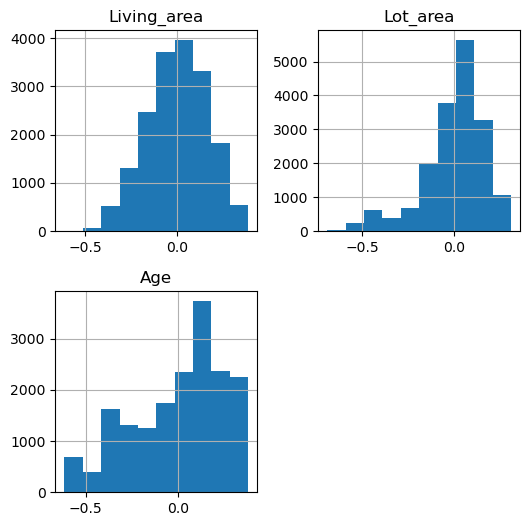

In [41]:
#Performing mean normalisation on lot Area, living Area and Age#

logLiving= df2d_log['log_Living'] 
logLot=df2d_log['log_Lot'] 
logAge=df2d_log['log_Age'] 

scaled_Living = (logLiving - np.mean(logLiving)) / (max(logLiving) - min(logLiving))
scaled_Lot = (logLot - np.mean(logLot)) / (max(logLot) - min(logLot))
scaled_Age = (logAge - np.mean(logAge)) / (max(logAge) - min(logAge))

df2d_cont_scaled = pd.DataFrame([])
df2d_cont_scaled['Living_area'] = scaled_Living
df2d_cont_scaled['Lot_area'] = scaled_Lot
df2d_cont_scaled['Age'] = scaled_Age

df2d_cont_scaled.hist(figsize = [6, 6]);
plt.savefig('Images/Model4_Feat_scaling_histplot.png',dpi=300,bbox_inches='tight')

In [42]:
#Creating a new dataframe#

df3=df2e.drop(columns=['Living_area','Lot_area','Age'], axis=1)
df3=pd.concat([df3,df2d_cont_scaled],axis=1)
df3.head()

Price  Bed_3  Bed_4  Bed_5  Bath_1.5  Bath_2.0  Bath_2.5  Bath_3.5  \
0  221900.0      1      0      0         0         0         0         0   
1  538000.0      1      0      0         0         0         0         0   
2  180000.0      0      0      0         0         0         0         0   
3  604000.0      0      1      0         0         0         0         0   
4  510000.0      1      0      0         0         1         0         0   

   Cond_2  Cond_5  Grd_7  Grd_8  Grd_9  Grd_10  Grd_11  Living_area  Lot_area  \
0       0       0      1      0      0       0       0    -0.178346 -0.028391   
1       0       0      1      0      0       0       0     0.165590  0.040455   
2       0       0      0      0      0       0       0    -0.366965  0.129947   
3       0       1      1      0      0       0       0     0.045865 -0.062286   
4       0       0      0      1      0       0       0    -0.022248  0.070821   

        Age  
0  0.166499  
1  0.187415  
2  0.269071  
3  0.108292  
4 -0.066230

In [43]:
#Checking effect by running Model 4#
#Model 4#

X4 = df3.drop('Price', axis=1)
y4 = df3['Price']
X4_int = sm.add_constant(X4)
model4 = sm.OLS(y4,X4_int).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.537
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     1206.
Date:                Mon, 17 Jul 2023   Prob (F-statistic):               0.00
Time:                        04:34:51   Log-Likelihood:            -2.3442e+05
No. Observations:               17703   AIC:                         4.689e+05
Df Residuals:                   17685   BIC:                         4.690e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        3.671e+05   4811.177     76.307      0.000    3.58e+05    3.77e+05
Bed_3       -3.898e+04   3456.235    -11.279      0.000   -4.58e+04   -3.22e+04
Bed_4       -4.662e+04   4210.764    -11.073      0.000   -5.49e+04   -3.84e+04
Bed_5       -4.551e+04   5867.379     -7.757      0.000    -5.7e+04    -3.4e+04
Bath_1.5    -1.758e+04   4045.778     -4.346      0.000   -2.55e+04   -9651.724
Bath_2.0    -8147.7104   3600.259     -2.263      0.024   -1.52e+04   -1090.849
Bath_2.5    -1.591e+04   2888.735     -5.507      0.000   -2.16e+04   -1.02e+04
Bath_3.5      5.32e+04   7240.209      7.347      0.000     3.9e+04    6.74e+04
Cond_2      -4.971e+04   1.26e+04     -3.957      0.000   -7.43e+04   -2.51e+04
Cond_5       4.313e+04   3938.708     10.951      0.000    3.54e+04    5.09e+04
Grd_7        7.563e+04   3811.218     19.844      0.000    6.82e+04    8.31e+04
Grd_8        1.797e+05   4595.740     39.093      0.000    1.71e+05    1.89e+05
Grd_9        3.312e+05   5900.052     56.136      0.000     3.2e+05    3.43e+05
Grd_10       4.189e+05   8353.619     50.140      0.000    4.02e+05    4.35e+05
Grd_11        5.12e+05   1.98e+04     25.905      0.000    4.73e+05    5.51e+05
Living_area  5.547e+05    1.1e+04     50.442      0.000    5.33e+05    5.76e+05
Lot_area    -2.762e+05   7228.360    -38.212      0.000    -2.9e+05   -2.62e+05
Age          3.001e+05   5627.064     53.327      0.000    2.89e+05    3.11e+05
==============================================================================
Omnibus:                      877.248   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1255.056
Skew:                           0.461   Prob(JB):                    2.94e-273
Kurtosis:                       3.923   Cond. No.                         26.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Testing assumptions of regression - Model 4
<p>
    <div align ="justify">
I chose to go with Model 4 for the next set of analyses ( see "Observations' below). Here I check whether Model 4 satisfies the assumptions of linearity, homoskedasticity and normality.
        </div>

#### Linearity check

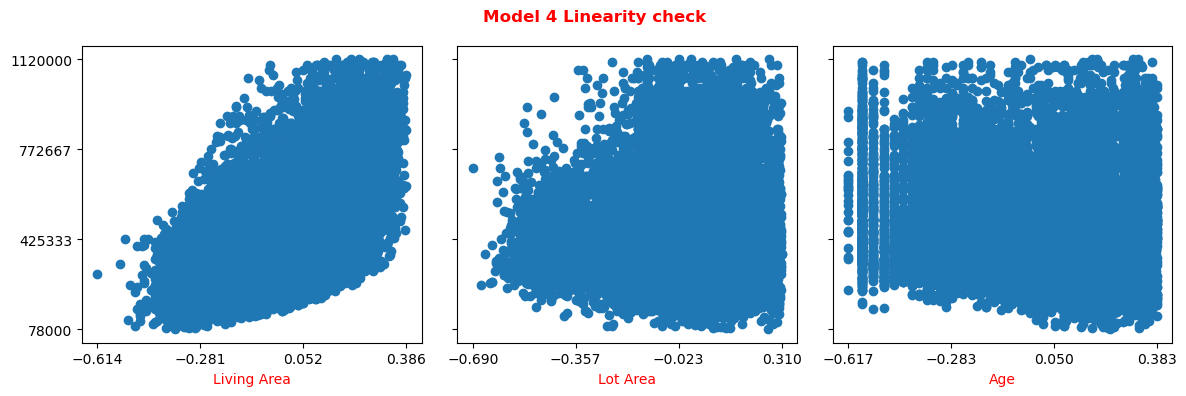

In [44]:
#Visualising linearity between independent and dependent variables in Model 4#

fig, (ax1, ax2,ax3) = plt.subplots(figsize=(12,4), nrows= 1, ncols=3, sharey=True)

y4=df3.Price
c1=df3.Living_area
c2=df3.Lot_area
c3=df3.Age

plt.ticklabel_format(style='plain')

ax1.scatter(c1,y4)
ax1.set_xlabel(('Living Area'), c="r")
xticks1 = np.linspace(start=min(c1), stop=max(c1), num=4)
yticks1 = np.linspace(start=min(y4), stop=max(y4), num=4)
ax1.set_xticks(xticks1)
ax1.set_yticks(yticks1)

ax2.scatter(c2,y4)
ax2.set_xlabel(('Lot Area'), c="r")
xticks2 = np.linspace(start=min(c2), stop=max(c2), num=4)
yticks2 = np.linspace(start=min(y4), stop=max(y4), num=4)
ax2.set_xticks(xticks2)
ax2.set_yticks(yticks2)

ax3.scatter(c3,y4)
ax3.set_xlabel(('Age'), c="r")
xticks3 = np.linspace(start=min(c3), stop=max(c3), num=4)
yticks3 = np.linspace(start=min(y4), stop=max(y4), num=4)
ax3.set_xticks(xticks3)
ax3.set_yticks(yticks3)

plt.suptitle("Model 4 Linearity check", c="r", fontsize = 12, fontweight ="bold")
plt.tight_layout()
plt.savefig('Images/Model4_Linearity_check_Scatter_plot.png',dpi=300,bbox_inches='tight')
plt.show()

#### Skedasticity check

eval_env: 1
eval_env: 1
eval_env: 1


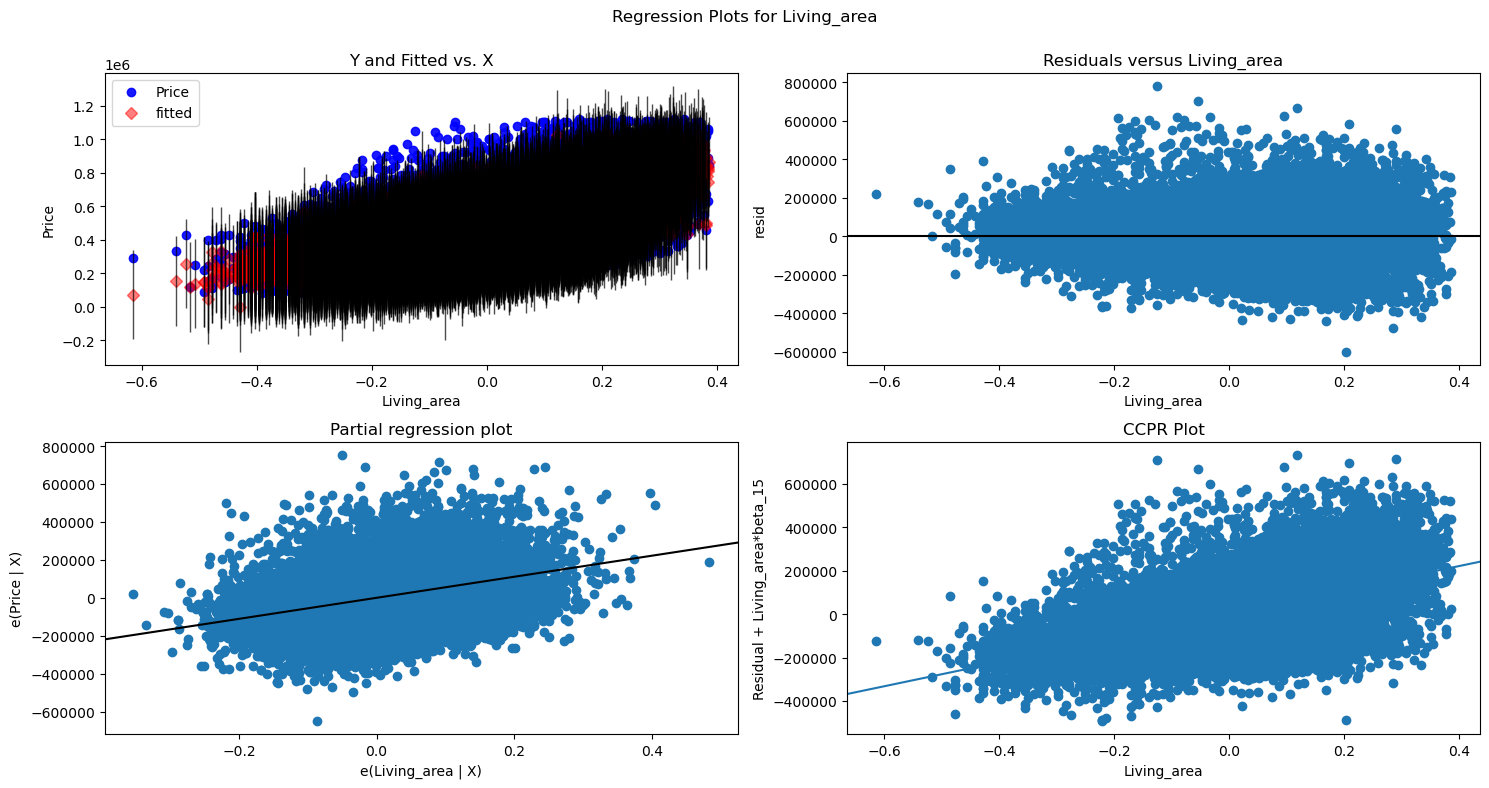

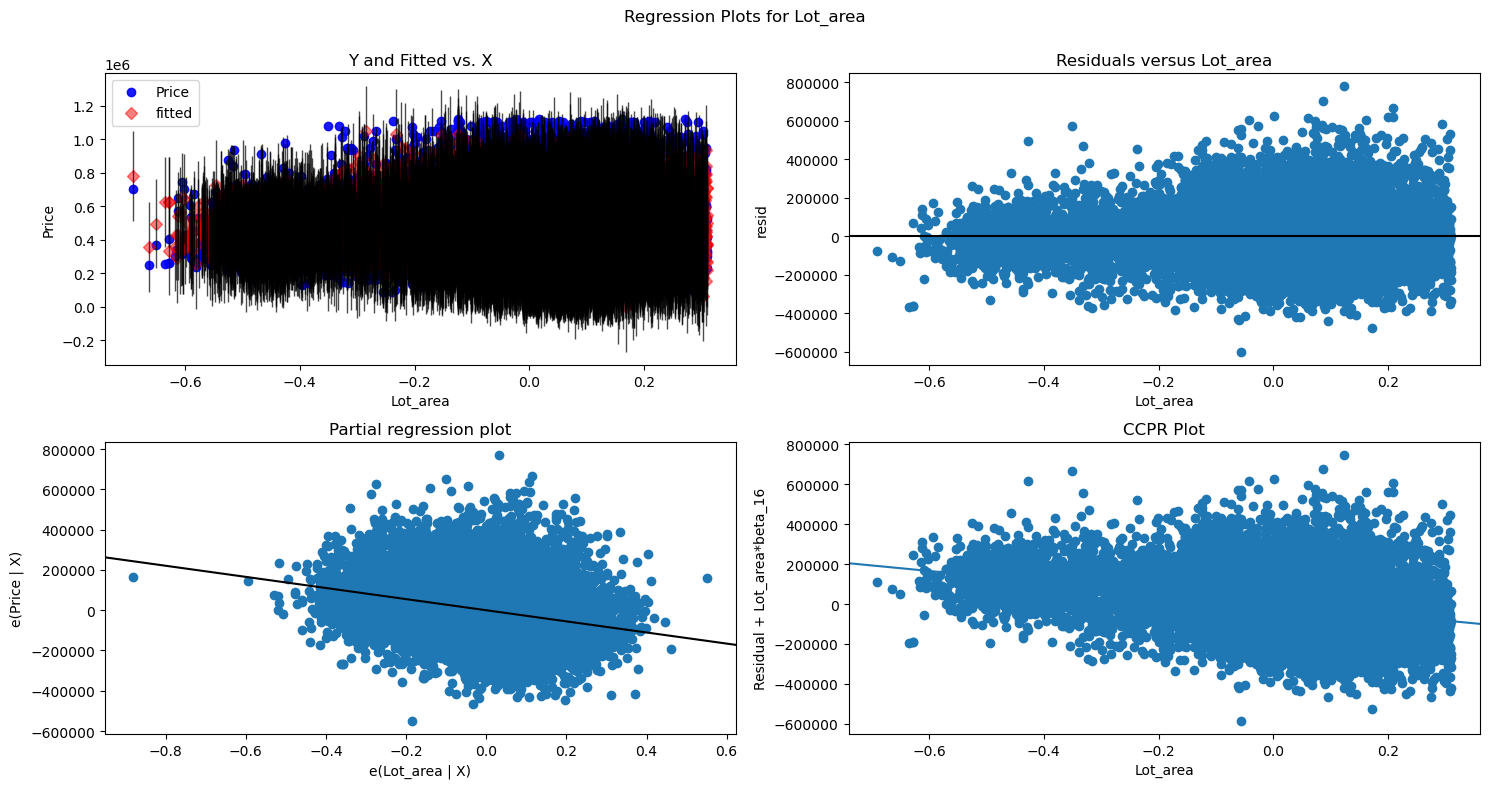

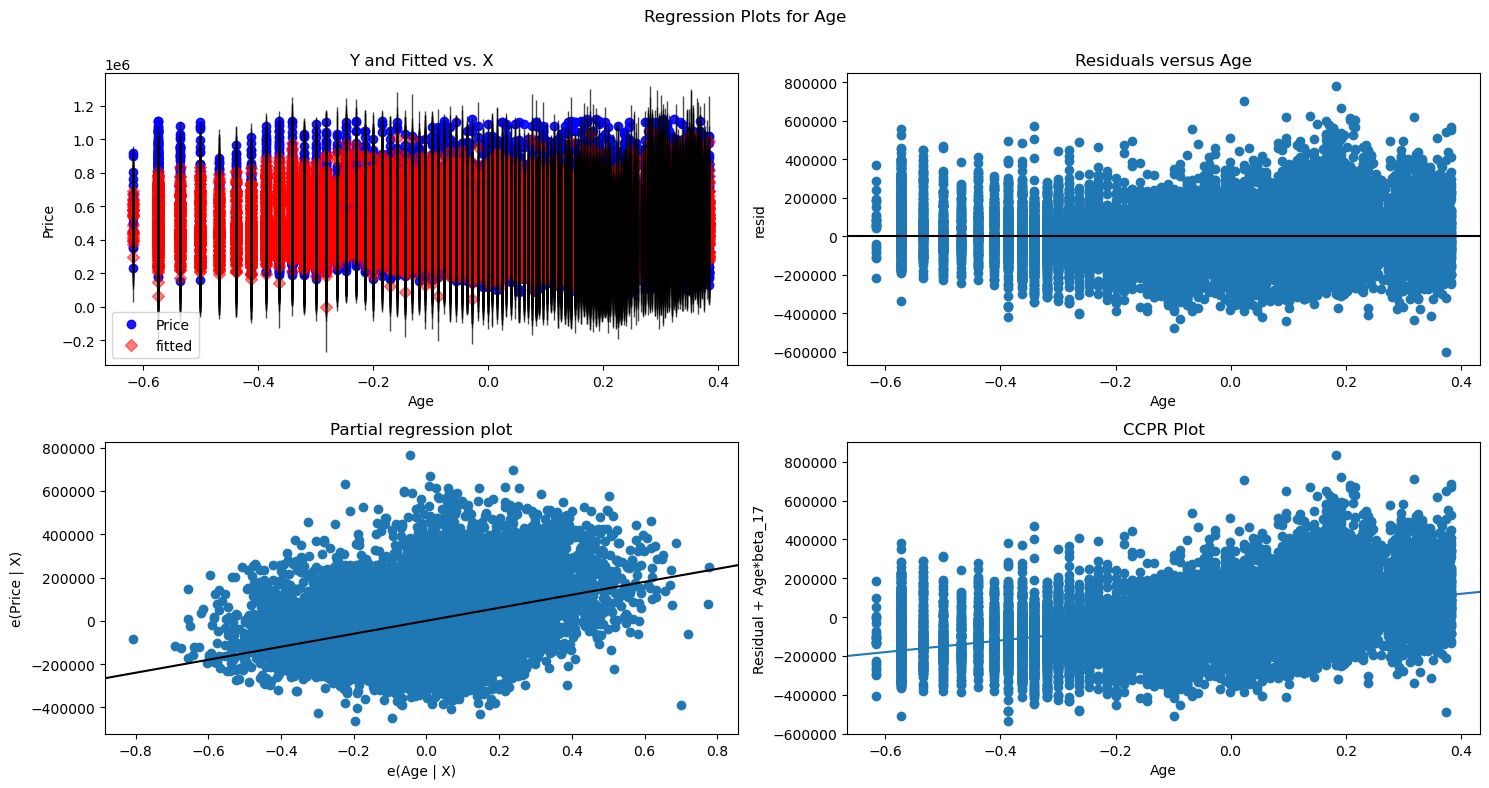

In [45]:
#Visualizing the error term for variance and skedasticity in Model 4#

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Living_area", fig=fig)
plt.savefig('Images/Var_sked_Model4_Living_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Lot_area",fig=fig)
plt.savefig('Images/Var_sked_Model4_Lot_area.png',dpi=300,bbox_inches='tight')

fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model4, "Age",fig=fig)
plt.savefig('Images/Var_sked_Model4_Age.png',dpi=300,bbox_inches='tight')

plt.show()

#### Normality check

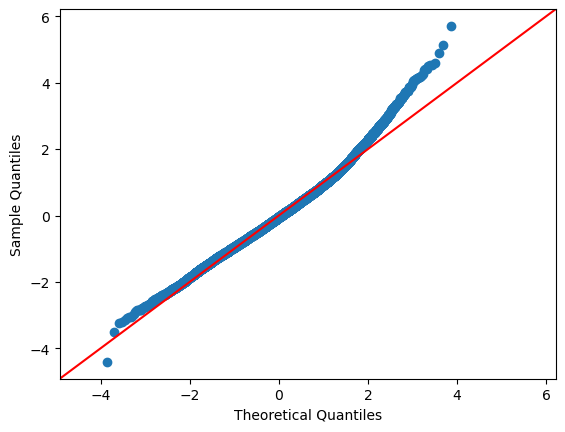

In [46]:
#Checking Normality assumption in Model 4 by Q-Q plot#

residuals4 = model4.resid
fig = sm.graphics.qqplot(residuals4, dist=stats.norm, line='45', fit=True);
plt.savefig('Images/Model4_QQ_plot.png',dpi=300,bbox_inches='tight')
plt.show()

### Observations: Models 3 and 4
<p>
    <div align ="justify">
    
1. There is no significant improvement in the Adjusted R-Squared value in either Model 3 or Model 4, however the condition number has significantly reduced, especially after feature scaling, suggesting that any multicollinearity or other errors indicated in earlier models have been eliminated. Removal of certain columns had almost the same effect as feature scaling (also see note below).
    <br>
    <br>
2. There is no significant change in the assumptions of regression from Model 2, indicating that the relationship between the independent and dependent variables appears to be reasonably robust. The skewness and kurtosis levels are within tolerated limits.
    <br>
    <br>
3. The coefficients for the constant and the three independent variables are all in the exact centre for the narrow ranges of each of the 95% confidence intervals. This appears to be true for the categorical variables as well. This corroborates Point 2 above.
    <br>
    <br>
4. The coefficients for 'Living area' and 'Age' are positive, indicating that an increase in either causes an increase in sale price, whilst the opposite is true of 'Lot area' (with a negative coefficient). 
         </div>
<p>
    <div align ="justify">
<b>Note: I used various permutations of column removals/feature scaling and reran models each time, but was unable to find any model that improved the existing results. In fact, most of those models had a much lower Adjusted R-squared value and increased skew and kurtosis. I have not included those iterations herein. Model 4 will be the final model used in this study.</b>
         </div>

### Step 5: Model validation
<p>
    <div align="justify">
Perform both Train-Test splits and Cross validation on the final model. Compare the R-Squared and Mean Squared Error values across the splits, and compute the accuracy of the model.
      </div>

#### Train-Test split

In [47]:
#Performing train-test split#

y5=df3[['Price']]
X5=df3.drop(['Price'],axis=1)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
print('Sizes of the Train-Test Split:')
print('X5_Train:',len(X5_train),'X5_Test:', len(X5_test), 'y5_Train:', len(y5_train), 'y5_test:', len(y5_test))
print()

KCH = LinearRegression()
KCH.fit(X5_train,y5_train)
print ('Predicted output:')
print(KCH.predict(X5_test))
print()
print ('Accuracy of model:',KCH.score(X5_test,y5_test))

Sizes of the Train-Test Split:
X5_Train: 14162 X5_Test: 3541 y5_Train: 14162 y5_test: 3541

Predicted output:
[[590283.27291654]
 [495986.45347999]
 [480259.68945952]
 ...
 [298273.42563508]
 [485028.43100883]
 [347945.70518039]]

Accuracy of model: 0.5400669334410992


In [48]:
#Getting Mean Squared Errors (MSE) using Decision Tree Regressor#

model4a=model4
model4a = DecisionTreeRegressor(random_state=42)
model4a.fit(X5_train, y5_train)

model4a_train_mse = mean_squared_error(y5_train, model4a.predict(X5_train))
model4a_test_mse = mean_squared_error(y5_test, model4a.predict(X5_test))
print('Train Mean Squared Error:', model4a_train_mse/10000000)
print('Test Mean Squared Error:', model4a_test_mse/10000000)

Train Mean Squared Error: 9.238671539564796
Test Mean Squared Error: 3233.8746297373837


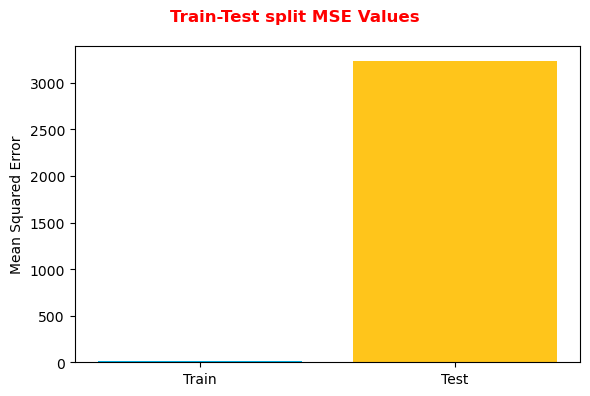

In [49]:
# Visualising MSE in train-test split#

M1=model4a_train_mse/10000000
M2=model4a_test_mse/10000000

labels = ["Train", "Test"]
colors = ["#00B3E6", "#FFC51B"]

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [M1, M2], color=colors)
ax.set_ylabel("Mean Squared Error")
fig.suptitle("Train-Test split MSE Values", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Train_test_MSE.png',dpi=300,bbox_inches='tight')

In [50]:
#Checking the R-squared values for train-test split#
print('R-Squared Values for Train-Test split:')
print()
print('Training data:',model4a.score(X5_train, y5_train))
print('Test data:',model4a.score(X5_test, y5_test))

R-Squared Values for Train-Test split:

Training data: 0.9977042317691207
Test data: 0.1848343874044449


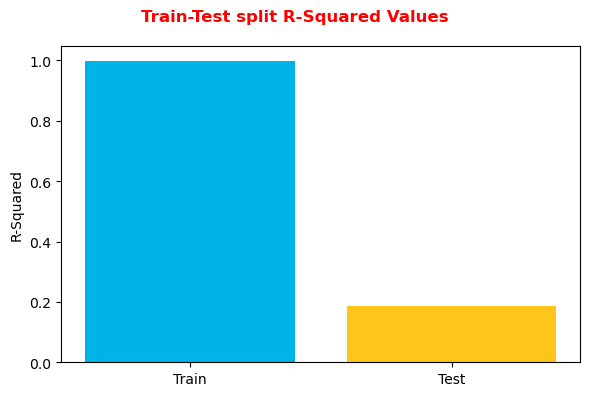

In [51]:
#Visualising R-Squared values in train-test split#

R1=model4a.score(X5_train, y5_train)
R2=model4a.score(X5_test, y5_test)

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [R1, R2], color=colors)
ax.set_ylabel("R-Squared")
fig.suptitle("Train-Test split R-Squared Values", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Train_test_R2.png',dpi=300,bbox_inches='tight')

#### Cross validation

In [52]:
#Comparing R-Squared values for training and test data over 10 splits# 

cvr = cross_validate(KCH, X5, y5,cv=10, scoring="r2", return_train_score=True)
train1=cvr["train_score"]
test1=cvr["test_score"]

print('R-Squared Values for Training and Test data over 10 splits:')
print ()
print('Training data:', train1)
print()
print('Test data:',test1)

R-Squared Values for Training and Test data over 10 splits:

Training data: [0.53585546 0.53717347 0.53873053 0.54023256 0.53793779 0.53633112
 0.53329442 0.53848493 0.5347041  0.53938175]

Test data: [0.54501287 0.53419372 0.52044075 0.49937335 0.5265769  0.54069803
 0.56578286 0.52036141 0.55539986 0.44845725]


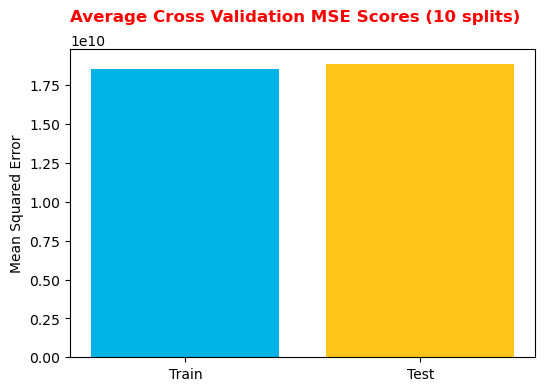

In [53]:
#Visualising cross validation MSE results#

cvr2 = cross_validate(KCH, X5, y5,cv=10, scoring="neg_mean_squared_error", return_train_score=True)
train_avg = -cvr2["train_score"].mean()
test_avg = -cvr2["test_score"].mean()

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("Mean Squared Error")
fig.suptitle("Average Cross Validation MSE Scores (10 splits)", c="r", fontsize=12, fontweight="bold")
plt.savefig('Images/Cross_val_MSE.png',dpi=300,bbox_inches='tight')

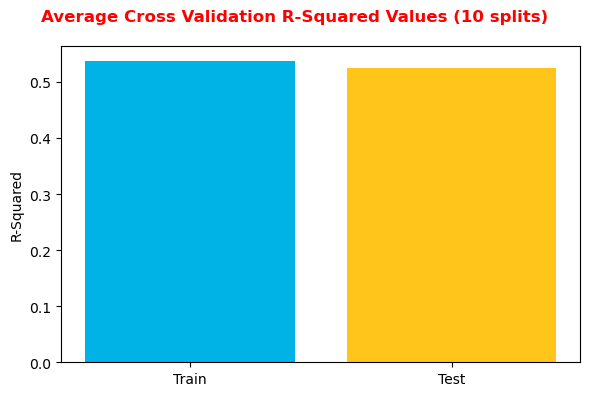

In [54]:
#Visualising cross validation average R-squared results over 10 splits#

train_avg = cvr["train_score"].mean()
test_avg = cvr["test_score"].mean()

fig, ax = plt.subplots(figsize=(6,4))
ax.bar(labels, [train_avg, test_avg], color=colors)
ax.set_ylabel("R-Squared")
fig.suptitle("Average Cross Validation R-Squared Values (10 splits)", c="r", fontsize=12, fontweight="bold")
fig.tight_layout()
plt.savefig('Images/Cross_val_R2.png',dpi=300,bbox_inches='tight')

### Conclusions
<p>
    <div align="justify">
        
1. The final model is overfitting as evidenced by the significant differences in R-Squared and Mean Squared Error values between the Train and Test datasets. Interestingly, cross-fold validation appears to show that the model is fitted correctly but that can be explained by the fact that it does not shuffle the data before splitting it into folds. This might mean that there are some aspects of the splits that are not representative of the actual training data and test data.
    <br>
    <br>
2. The model will predict correctly around 54% of the time, which is acceptable since it is an inference model.
    <br>
    <br>
3. The best indicator for a good sale price for a property appears to be the size of the living area. The age of the property might be a factor although the spread suggests that some older properties also sell at high prices. This could possibly be because the data includes heritage properties, etc. The area of the lot, and the number of bedrooms and bathrooms has an inverse relationship with sale prices. It is possible that bigger lots require more maintenance or development. Buyers might be looking for fewer bedrooms in a larger living space. It is logical to assume that the better the condition and grade of the property, the better the sale value. 
            </div>    

### Actionable insight
<p>
    <div align="justify">
        
The two main co-efficients I would choose to infer property sale prices in King County are 'Living_area' and 'Lot_area'. 
        </div>